# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [ ]:
#Installation librairie
# pip install ipykernel jupyter pandas numpy matplotlib seaborn scikit-learn openpyxl
#Importation librairie
import ipykernel
import jupyter
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn
import openpyxl
import seaborn as sns
from scipy import stats




In [ ]:


# Importations fichiers dans dataframe
df = pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')
df_portefeuille = pd.read_excel('portefeuille_actifs+(3).xlsx')

# Affichage dimensions pour vérifier import
print("Taille du DataFrame principal :", df.shape)
print("Taille du DataFrame portefeuille :", df_portefeuille.shape)


Taille du DataFrame principal : (26196, 9)
Taille du DataFrame portefeuille : (275, 12)


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [ ]:
#On vérifie que le type des données attribué par pandas est cohérent
# Affichage des types de données
print("=== TYPES DE DONNÉES ===")
print(df.dtypes)


# Affichage d'informations supplémentaires
print("\n=== RÉSUMÉ DU DATAFRAME ===")
print(df.info())


=== TYPES DE DONNÉES ===
date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

=== RÉSUMÉ DU DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [ ]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')

print("\n=== TYPES UNIQUES DE BIENS ===")
print(df['type_local'].unique())


la liste des différents types de biens immobiliers que nous avons dans les données est ?:

=== TYPES UNIQUES DE BIENS ===
['Appartement' 'Local industriel. commercial ou assimilé']


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 pour les appartements et 4 pour les locaux.

### 3. Nombre de transactions

In [ ]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
# Nombre total de transactions
print('Le nombre de transactions dans les données est :')
print(len(df))  # ou df.shape[0]

# Nombre de transactions pour les appartements
print('\nLe nombre de transactions pour les appartements dans les données est :')
print(len(df[df['type_local'] == 'Appartement']))  # Filtrage avec condition

# Nombre de transactions pour les locaux commerciaux
print('\nLe nombre de transactions pour les locaux pro dans les données est :')
print(len(df[df['type_local'] == 'Local industriel. commercial ou assimilé']))  # Filtrage avec condition

# Calcul pourcentage
print('\nRépartition en pourcentage :')
total = len(df)
appart = len(df[df['type_local'] == 'Appartement'])
commerce = len(df[df['type_local'] == 'Local industriel. commercial ou assimilé'])

print(f'Appartements : {(appart/total*100):.2f}%')
print(f'Locaux commerciaux : {(commerce/total*100):.2f}%')

Le nombre de transactions dans les données est :
26196

Le nombre de transactions pour les appartements dans les données est :
24353

Le nombre de transactions pour les locaux pro dans les données est :
1843

Répartition en pourcentage :
Appartements : 92.96%
Locaux commerciaux : 7.04%


### 4. interval de l'historique des données

In [ ]:
#On vérifie également la plage de l'historique disponible
# Date première transaction
print('La première date de transaction dans les données est le :')
print(df['date_mutation'].min())

# Date dernière transaction
print('\nLa dernière date de transaction dans les données est le :')
print(df['date_mutation'].max())

# Calcul de la période couverte
print('\nPériode couverte par les données :')
periode = df['date_mutation'].max() - df['date_mutation'].min()
print(f'Durée totale : {periode.days} jours ({periode.days/365.25:.1f} années)')

La première date de transaction dans les données est le :
2017-01-02 00:00:00

La dernière date de transaction dans les données est le :
2021-12-31 00:00:00

Période couverte par les données :
Durée totale : 1824 jours (5.0 années)


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [ ]:
# Calcul de la colonne prix au m²
df['prix_m2'] = (df['valeur_fonciere'] / df['surface_reelle']).round(2)

# Vérification des résultats
print("=== APERÇU DES PRIX AU M² ===")
print("\nStatistiques descriptives des prix au m² :")
print(df['prix_m2'].describe())

# Vérification des valeurs problématiques
print("\nNombre de valeurs manquantes ou infinies :")
print("Valeurs manquantes (NA) :", df['prix_m2'].isna().sum())
print("Valeurs infinies (inf) :", df['prix_m2'].isin([float('inf'), float('-inf')]).sum())

# Affichage des premiers résultats pour vérification
print("\nExemple de quelques biens avec leurs prix au m² :")
print(df[['type_local', 'valeur_fonciere', 'surface_reelle', 'prix_m2']].head())

=== APERÇU DES PRIX AU M² ===

Statistiques descriptives des prix au m² :
count    26196.000000
mean     10325.993333
std       1432.410178
min       7196.490000
25%       9320.802500
50%      10035.670000
75%      10941.130000
max      15547.800000
Name: prix_m2, dtype: float64

Nombre de valeurs manquantes ou infinies :
Valeurs manquantes (NA) : 0
Valeurs infinies (inf) : 0

Exemple de quelques biens avec leurs prix au m² :
    type_local  valeur_fonciere  surface_reelle   prix_m2
0  Appartement     5.505597e+05              50  11011.19
1  Appartement     1.576492e+06             163   9671.73
2  Appartement     6.577574e+05              66   9966.02
3  Appartement     2.500868e+05              22  11367.58
4  Appartement     1.762667e+05              15  11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [ ]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'adresse_numero',
    'adresse_nom_voie',
    'nom_commune',
    'type_local'
]

# Suppression des colonnes
df.drop(columns=colonnes_a_supprimer, inplace=True)

# Vérification du résultat
print("=== VÉRIFICATION DE LA SUPPRESSION DES COLONNES ===")
print("\nColonnes restantes dans le DataFrame :")
print(df.columns.tolist())
print("\nDimensions du DataFrame après suppression :", df.shape)

=== VÉRIFICATION DE LA SUPPRESSION DES COLONNES ===

Colonnes restantes dans le DataFrame :
['date_mutation', 'valeur_fonciere', 'code_postal', 'code_type_local', 'surface_reelle', 'prix_m2']

Dimensions du DataFrame après suppression : (26196, 6)


In [ ]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# --- Étape 1: Filtrer le DataFrame pour ne garder que les appartements ---
# On crée un nouveau DataFrame qui ne contient que les lignes où 'code_type_local' est égal à 2.
df_appartements = df[df['code_type_local'] == 2].copy()

# Vérification : on s'assure que le nombre de lignes correspond bien à ce que l'on attend.
print(f"Nombre total de transactions initial : {df.shape[0]}")
print(f"Nombre d'appartements analysés : {df_appartements.shape[0]}")

# --- Étape 2: Préparer et agréger les données des appartements ---
# Maintenant, on travaille UNIQUEMENT sur ce nouveau DataFrame filtré.

# Création d'une colonne année à partir de date_mutation
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Création du DataFrame groupé par année
df_annuel_appartements = df_appartements.groupby('annee').agg({
    'valeur_fonciere': 'mean',  # Prix moyen
    'surface_reelle': 'mean',   # Surface moyenne
    'prix_m2': 'mean'          # Prix au m² moyen
}).round(2)

# Renommage des colonnes pour plus de clarté
df_annuel_appartements.columns = ['prix_moyen', 'surface_moyenne', 'prix_m2_moyen']

# --- Étape 3: Affichage des résultats ---
print("\n=== ÉVOLUTION ANNUELLE (APPARTEMENTS UNIQUEMENT) ===")
display(df_annuel_appartements)

Nombre total de transactions initial : 26196
Nombre d'appartements analysés : 24353

=== ÉVOLUTION ANNUELLE (APPARTEMENTS UNIQUEMENT) ===


,prix_moyen,surface_moyenne,prix_m2_moyen
annee,,,
2017,427963.24,44.63,9492.86
2018,448055.76,44.27,10031.40
2019,461950.06,43.36,10562.71
2020,462383.25,42.90,10674.87
2021,458771.51,43.48,10455.60


In [ ]:
# --- Étape 4: Calcul et affichage de la variation en pourcentage ---


print("\n=== VARIATIONS ENTRE LA PREMIÈRE ET LA DERNIÈRE ANNÉE (APPARTEMENTS) ===")

# 1. Identifier la première et la dernière année de l'index
premiere_annee = df_annuel_appartements.index.min()
derniere_annee = df_annuel_appartements.index.max()
print(f"Période analysée : de {premiere_annee} à {derniere_annee}")

# 2. Récupérer les valeurs initiales et finales
prix_m2_initial = df_annuel_appartements.loc[premiere_annee, 'prix_m2_moyen']
prix_m2_final = df_annuel_appartements.loc[derniere_annee, 'prix_m2_moyen']

# 3. Calculer la variation en pourcentage
variation_prix_m2 = ((prix_m2_final / prix_m2_initial) - 1) * 100

# 4. Afficher le résultat avec un formatage clair
print(f"\nPrix au m² moyen en {premiere_annee} : {prix_m2_initial:,.2f} €")
print(f"Prix au m² moyen en {derniere_annee} : {prix_m2_final:,.2f} €")
print(f"--> Évolution du prix au m² sur la période : {variation_prix_m2:+.1f}%") # Le '+' affiche le signe même si c'est positif




=== VARIATIONS ENTRE LA PREMIÈRE ET LA DERNIÈRE ANNÉE (APPARTEMENTS) ===
Période analysée : de 2017 à 2021

Prix au m² moyen en 2017 : 9,492.86 €
Prix au m² moyen en 2021 : 10,455.60 €
--> Évolution du prix au m² sur la période : +10.1%


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

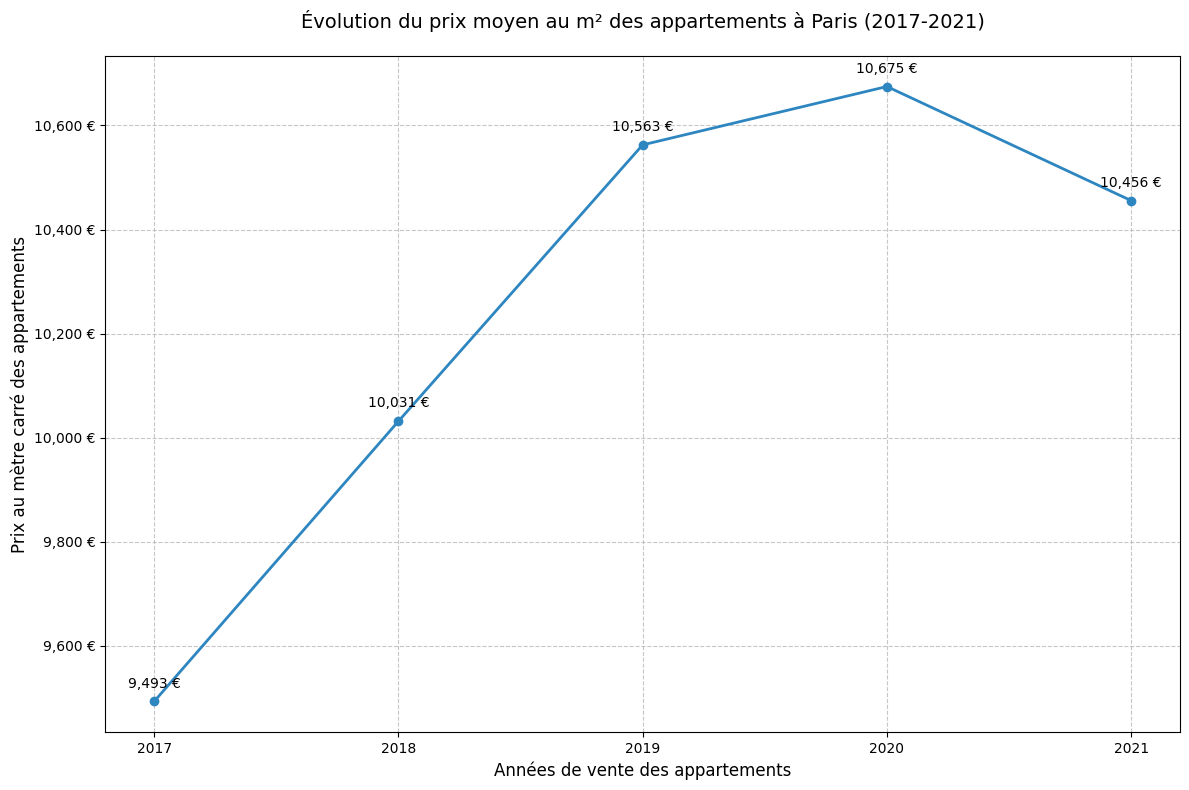

In [ ]:
# Création du graphique

if 'df_annuel_appartements' in locals():
    # Configuration de la taille du graphique
    plt.figure(figsize=(12, 8))

    # Création du graphique linéaire
    plt.plot(df_annuel_appartements.index, df_annuel_appartements['prix_m2_moyen'],
             marker='o',  # Ajoute des points sur chaque année
             linewidth=2, # Épaisseur de la ligne
             color='#2E86C1')  # Couleur

    # Personnalisation des axes
    plt.xlabel('Années de vente des appartements', fontsize=12)
    plt.ylabel('Prix au mètre carré des appartements', fontsize=12)

    # Formatage de l'axe y en euros
    formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
    plt.gca().yaxis.set_major_formatter(formatter)

    # Ajout d'une grille
    plt.grid(True, linestyle='--', alpha=0.7)

    # Titre du graphique
    plt.title('Évolution du prix moyen au m² des appartements à Paris (2017-2021)',
             fontsize=14, pad=20)

    # Rotation des labels de l'axe x pour une meilleure lisibilité
    plt.xticks(df_annuel_appartements.index, rotation=0)

    # Ajout des valeurs sur les points
    for x, y in zip(df_annuel_appartements.index, df_annuel_appartements['prix_m2_moyen']):
        plt.annotate(f'{y:,.0f} €',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    # Ajustement des marges
    plt.tight_layout()

    # Affichage du graphique
    plt.show()
else:
    print("ERREUR : Le DataFrame 'df_annuel_appartements' n'a pas été défini. Veuillez exécuter la cellule précédente.")

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [ ]:


    # --- Analyse sur les données des appartements uniquement ---

    # Affichage des codes postaux uniques triés
    print("=== LISTE DES CODES POSTAUX POUR LES APPARTEMENTS ===")
    codes_postaux_numpy = sorted(df_appartements['code_postal'].unique())

    # On convertit le tableau numpy en une liste Python standard
    codes_postaux_liste = list(codes_postaux_numpy)
    print("\nCodes postaux présents :", codes_postaux_liste)

    # Vérification de la complétude
    print(f"\nNombre d'arrondissements avec des appartements : {len(codes_postaux_liste)}")

    # Statistiques par arrondissement
    print("\n=== NOMBRE DE TRANSACTIONS PAR ARRONDISSEMENT (APPARTEMENTS) ===")
    transactions_par_arr_appart = df_appartements['code_postal'].value_counts().sort_index()
    print(transactions_par_arr_appart)

    # Prix moyen au m² par arrondissement
    print("\n=== PRIX MOYEN AU M² PAR ARRONDISSEMENT (APPARTEMENTS) ===")
    prix_par_arr_appart = df_appartements.groupby('code_postal')['prix_m2'].mean().round(2).sort_index()
    print(prix_par_arr_appart)



=== LISTE DES CODES POSTAUX POUR LES APPARTEMENTS ===

Codes postaux présents : [np.int64(75001), np.int64(75002), np.int64(75003), np.int64(75004), np.int64(75005), np.int64(75006), np.int64(75007), np.int64(75008), np.int64(75009), np.int64(75010), np.int64(75011), np.int64(75012), np.int64(75013), np.int64(75014), np.int64(75015), np.int64(75016), np.int64(75017), np.int64(75018), np.int64(75019), np.int64(75020)]

Nombre d'arrondissements avec des appartements : 20

=== NOMBRE DE TRANSACTIONS PAR ARRONDISSEMENT (APPARTEMENTS) ===
code_postal
75001     409
75002     666
75003     784
75004     548
75005     829
75006     709
75007     607
75008     628
75009     969
75010    1227
75011    1932
75012    1036
75013     870
75014    1248
75015    2308
75016    1947
75017    2212
75018    2805
75019    1091
75020    1528
Name: count, dtype: int64

=== PRIX MOYEN AU M² PAR ARRONDISSEMENT (APPARTEMENTS) ===
code_postal
75001    12833.90
75002    11667.52
75003    12465.63
75004    13123.5

/tmp/ipython-input-143-1030945144.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




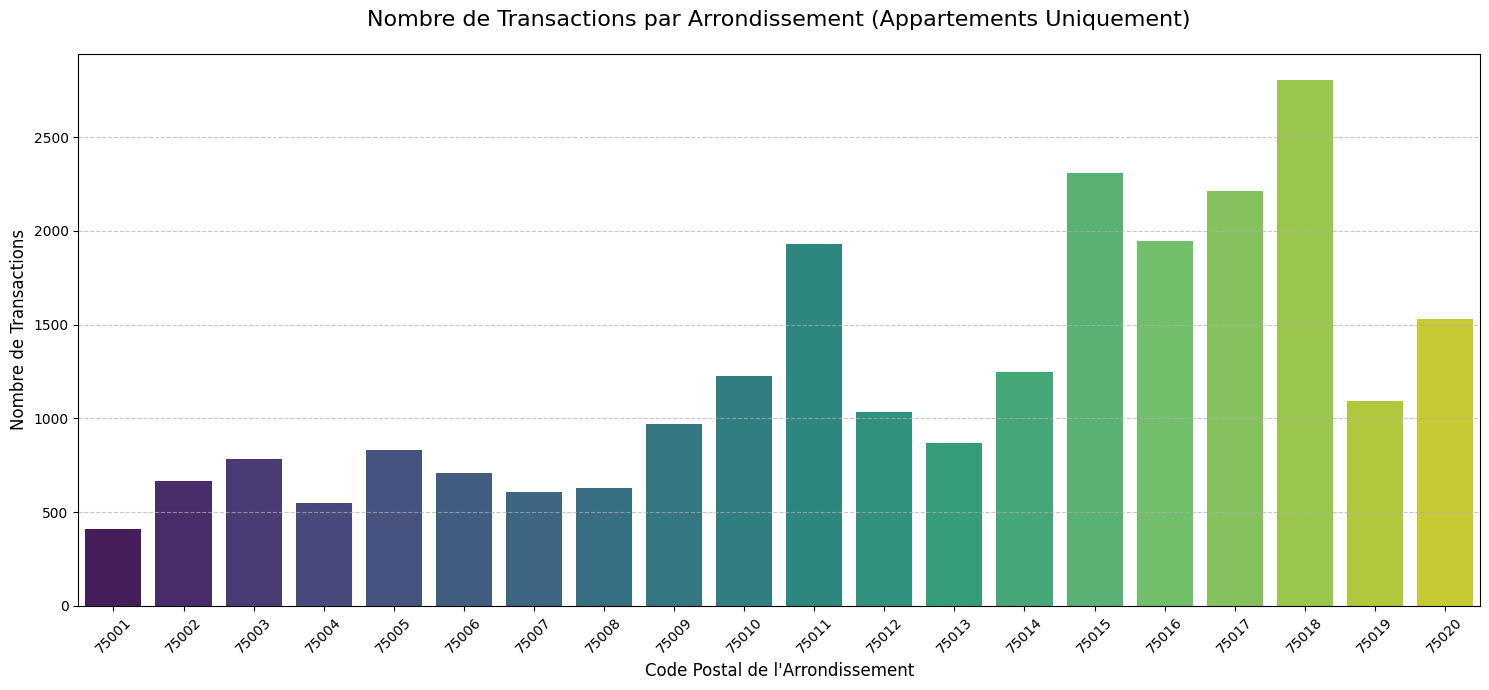

/tmp/ipython-input-143-1030945144.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




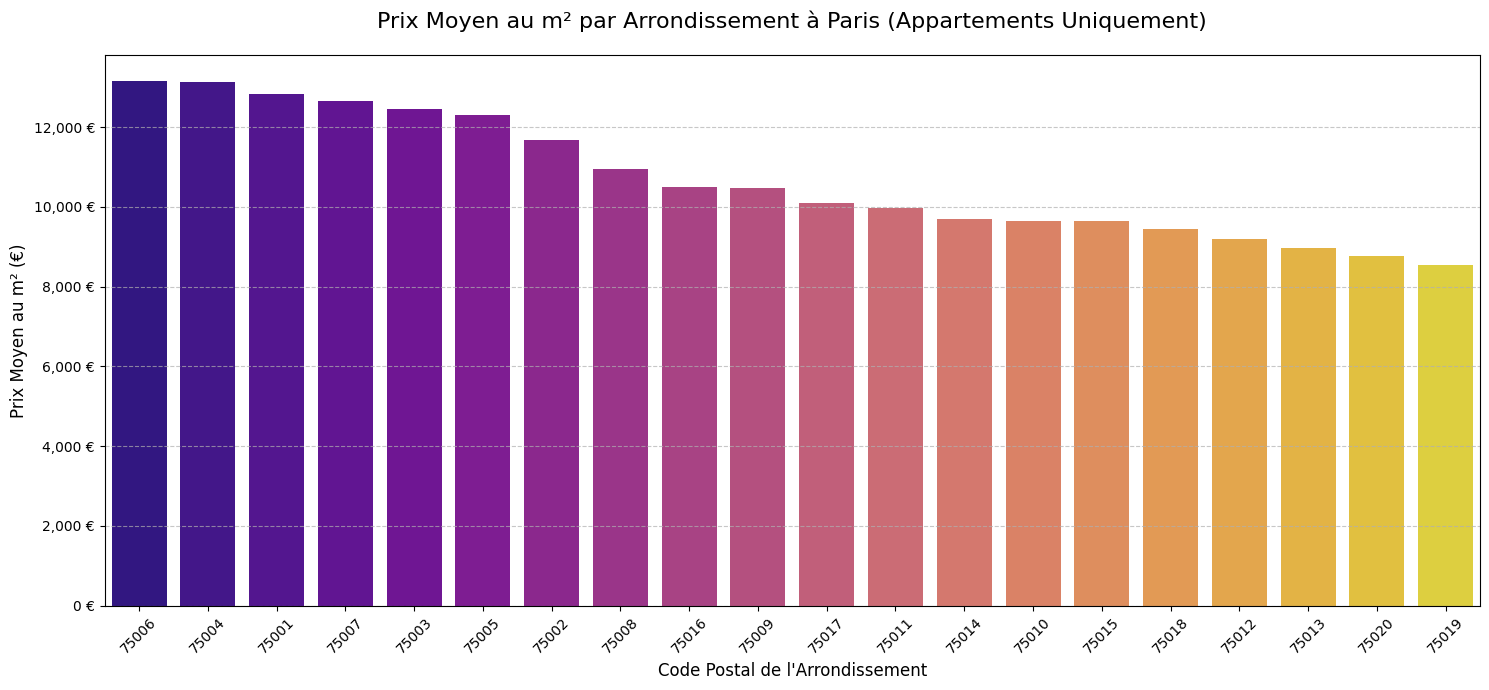

In [ ]:


    # --- Graphique 1: Nombre de Transactions par Arrondissement (Appartements) ---

    plt.figure(figsize=(15, 7))

    # Utilisation de seaborn avec les données des appartements
    sns.barplot(x=transactions_par_arr_appart.index, y=transactions_par_arr_appart.values, palette='viridis')

    # Mise à jour du titre
    plt.title('Nombre de Transactions par Arrondissement (Appartements Uniquement)', fontsize=16, pad=20)
    plt.xlabel('Code Postal de l\'Arrondissement', fontsize=12)
    plt.ylabel('Nombre de Transactions', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    # --- Graphique 2: Prix Moyen au m² par Arrondissement (Appartements, Trié) ---

    # On trie les arrondissements par prix pour les appartements
    prix_par_arr_appart_trie = prix_par_arr_appart.sort_values(ascending=False)

    plt.figure(figsize=(15, 7))

    # Utilisation de seaborn avec les données des appartements triées
    sns.barplot(x=prix_par_arr_appart_trie.index.astype(str), y=prix_par_arr_appart_trie.values, palette='plasma')

    # Mise à jour du titre
    plt.title('Prix Moyen au m² par Arrondissement à Paris (Appartements Uniquement)', fontsize=16, pad=20)
    plt.xlabel('Code Postal de l\'Arrondissement', fontsize=12)
    plt.ylabel('Prix Moyen au m² (€)', fontsize=12)

    # Formatage de l'axe y en euros
    formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



=== CLASSEMENT DES ARRONDISSEMENTS PAR SCORE DE RENTABILITÉ (APPARTEMENTS UNIQUEMENT) ===


,nb_transactions,prix_m2_moyen,score_rentabilite
code_postal,,,
75018,2805,9442.45,26486072.25
75017,2212,10085.24,22308550.88
75015,2308,9636.22,22240395.76
75016,1947,10487.18,20418539.46
75011,1932,9979.58,19280548.56
75020,1528,8762.77,13389512.56
75014,1248,9691.58,12095091.84
75010,1227,9655.44,11847224.88
75005,829,12295.09,10192629.61


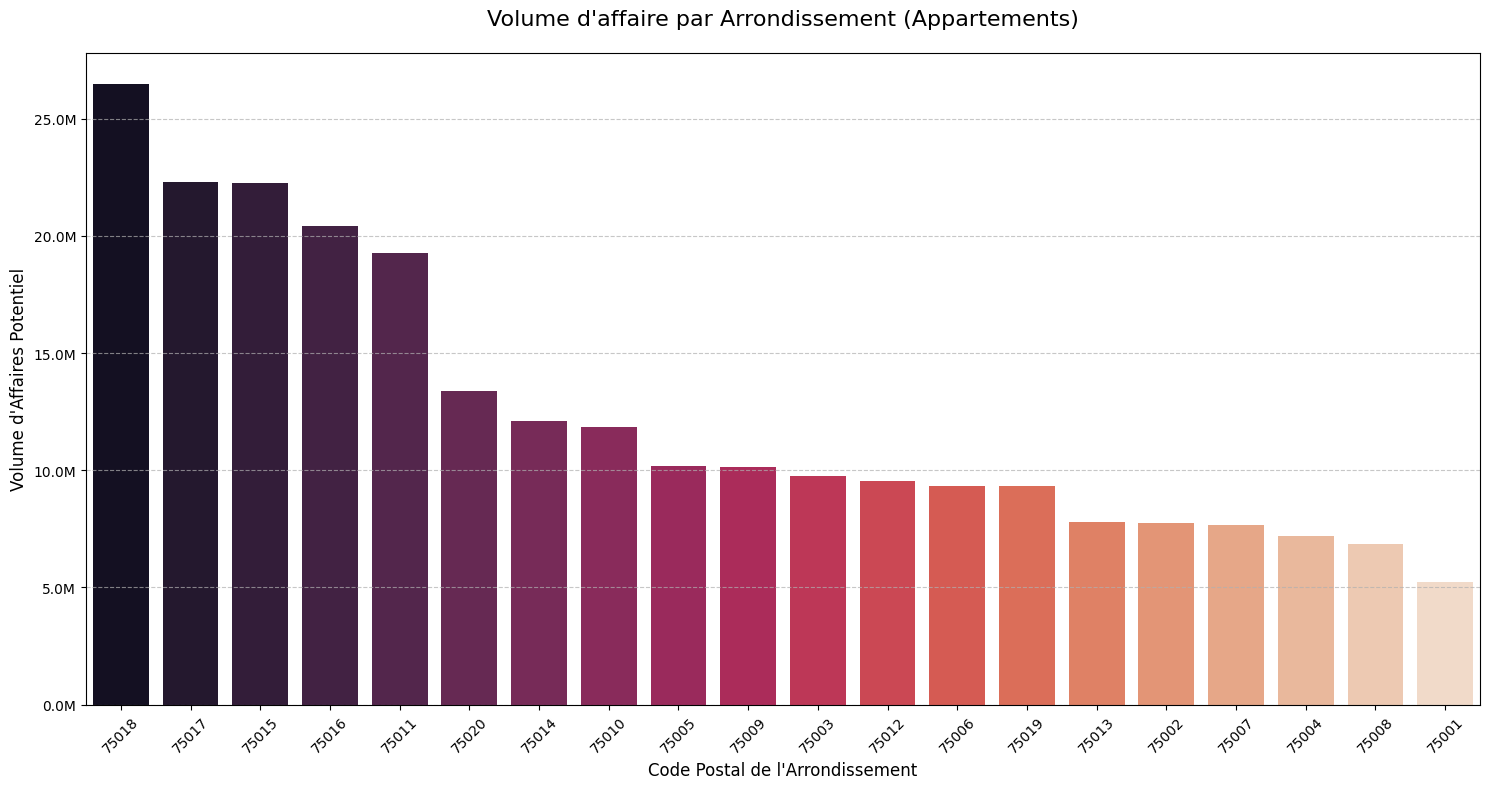

In [ ]:

    # --- Étape 1: Création du DataFrame de rentabilité (pour les appartements) ---
    # On fusionne les deux Series spécifiques aux appartements
    df_rentabilite_appart = pd.DataFrame({
        'nb_transactions': transactions_par_arr_appart,
        'prix_m2_moyen': prix_par_arr_appart
    })

    # --- Étape 2: Calcul du Score de Rentabilité (pour les appartements) ---
    df_rentabilite_appart['score_rentabilite'] = df_rentabilite_appart['nb_transactions'] * df_rentabilite_appart['prix_m2_moyen']

    # --- Étape 3: Tri et Préparation pour la visualisation ---
    # On trie par ce nouveau score
    df_rentabilite_appart_trie = df_rentabilite_appart.sort_values(by='score_rentabilite', ascending=False)

    print("=== CLASSEMENT DES ARRONDISSEMENTS PAR SCORE DE RENTABILITÉ (APPARTEMENTS UNIQUEMENT) ===")
    display(df_rentabilite_appart_trie)

    # --- Étape 4: Visualisation du Score de Rentabilité (pour les appartements) ---
    plt.figure(figsize=(15, 8))

    # Création du bar plot
    ax = sns.barplot(
        x=df_rentabilite_appart_trie.index.astype(str),
        y=df_rentabilite_appart_trie['score_rentabilite'],
        palette='rocket',
        hue=df_rentabilite_appart_trie.index.astype(str),
        legend=False
    )

    # Configuration du graph
    plt.title("Volume d'affaire par Arrondissement (Appartements)", fontsize=16, pad=20)
    plt.xlabel("Code Postal de l'Arrondissement", fontsize=12)
    plt.ylabel("Volume d'Affaires Potentiel", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    formatter = ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M')
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()


In [ ]:


    # --- Création du DataFrame avec l'évolution des prix (Appartements Uniquement) ---
    df_evolution_arr_appart = df_appartements.groupby(['annee', 'code_postal'])['prix_m2'].mean().round(2).unstack()

    # Renommage des colonnes pour plus de clarté
    df_evolution_arr_appart.columns = [f'Paris {str(cp)[-2:]}e' for cp in df_evolution_arr_appart.columns]

    # Affichage du résultat
    print("=== ÉVOLUTION DES PRIX AU M² PAR ARRONDISSEMENT (APPARTEMENTS) ===")
    display(df_evolution_arr_appart)

    # Calcul des variations entre 2017 et 2021 (pour les appartements)
    print("\n=== VARIATION DES PRIX ENTRE 2017 ET 2021 (APPARTEMENTS) ===")
    variation_appart = ((df_evolution_arr_appart.loc[2021] / df_evolution_arr_appart.loc[2017] - 1) * 100).round(1)
    print("Variation en % :")
    display(variation_appart.sort_values(ascending=False))


=== ÉVOLUTION DES PRIX AU M² PAR ARRONDISSEMENT (APPARTEMENTS) ===


,Paris 01e,Paris 02e,Paris 03e,Paris 04e,Paris 05e,Paris 06e,Paris 07e,Paris 08e,Paris 09e,Paris 10e,Paris 11e,Paris 12e,Paris 13e,Paris 14e,Paris 15e,Paris 16e,Paris 17e,Paris 18e,Paris 19e,Paris 20e
annee,,,,,,,,,,,,,,,,,,,,
2017,11762.71,10920.13,11679.82,12407.23,11306.75,12508.84,11845.12,10132.80,9582.31,8747.00,9137.78,8454.85,8344.89,9054.81,9097.89,9808.82,9336.87,8466.30,7621.76,7886.02
2018,12621.23,11309.46,12470.00,13431.89,12056.44,12896.28,12553.18,10631.30,10187.21,9328.03,9688.95,8937.73,8755.22,9433.54,9328.04,10244.44,9880.66,9152.93,8265.86,8485.16
2019,13269.26,12150.54,12813.40,13641.49,12928.38,13378.07,12921.89,11195.45,10957.78,9999.13,10376.91,9497.68,9340.37,10027.17,9822.11,10825.03,10399.61,9928.34,8850.26,9093.99
2020,13405.99,12181.59,12834.31,13104.74,12959.76,13807.09,13109.83,11702.93,10981.24,10200.33,10533.07,9691.11,9333.90,10107.80,10061.24,10911.14,10536.29,9946.89,8982.62,9329.31
2021,13379.50,11773.45,12660.55,12936.96,12605.84,13795.05,13118.14,11710.09,10732.18,10043.47,10351.64,9657.98,9164.63,9993.62,9971.24,10790.31,10372.37,9665.64,8828.59,9114.40



=== VARIATION DES PRIX ENTRE 2017 ET 2021 (APPARTEMENTS) ===
Variation en % :


,0
Paris 19e,15.8
Paris 08e,15.6
Paris 20e,15.6
Paris 10e,14.8
Paris 12e,14.2
Paris 18e,14.2
Paris 01e,13.7
Paris 11e,13.3
Paris 09e,12.0
Paris 05e,11.5


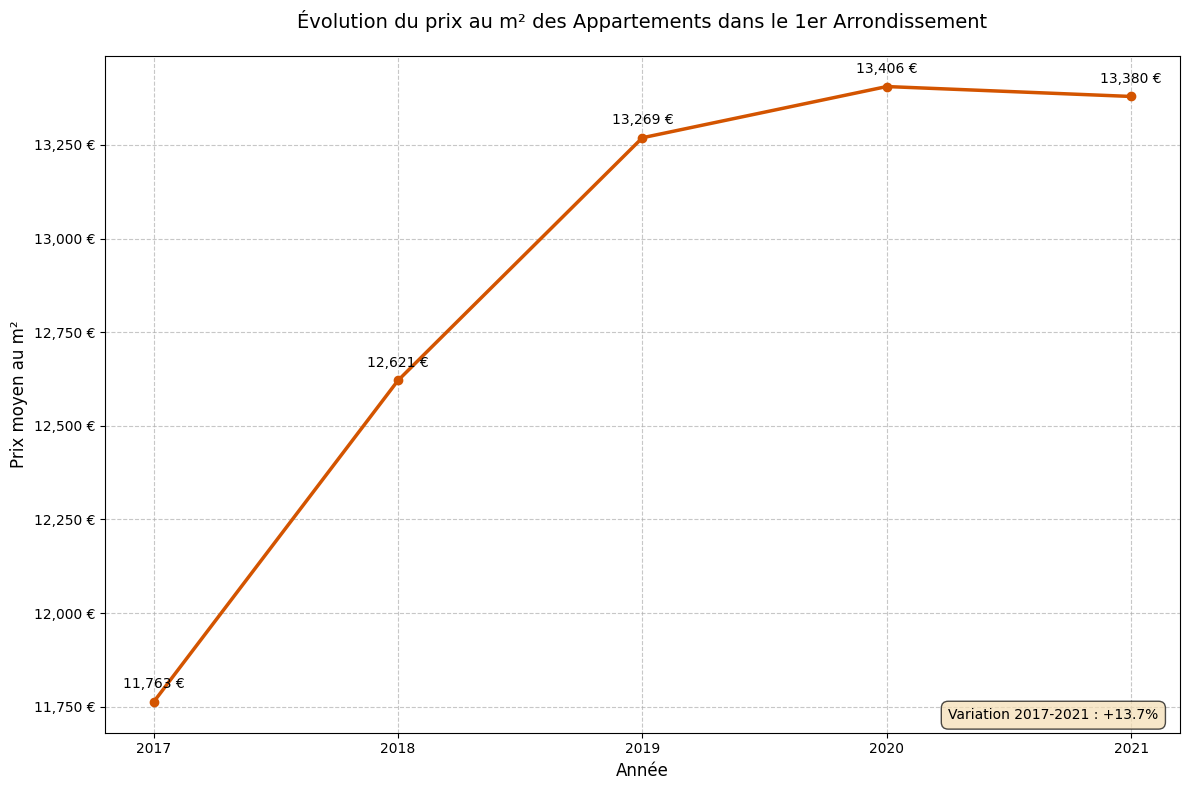

In [ ]:

    # --- Préparation des données pour le graphique ---
    colonne_1er_arr = 'Paris 01e'

    # Vérifier si le 1er arrondissement est bien présent dans nos données
    if colonne_1er_arr in df_evolution_arr_appart.columns:

        # Récupération des données du 1er arrondissement (appartements uniquement)
        prix_1er_appart = df_evolution_arr_appart[colonne_1er_arr]

        # --- Création du graphique ---
        plt.figure(figsize=(12, 8))

        plt.plot(prix_1er_appart.index, prix_1er_appart.values,
                 color='#D35400',
                 marker='o',
                 linewidth=2.5,
                 label='Prix au m² (Appartements)')

        # --- Personnalisation du graphique ---
        plt.xlabel('Année', fontsize=12)
        plt.ylabel('Prix moyen au m²', fontsize=12)

        formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
        plt.gca().yaxis.set_major_formatter(formatter)

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title('Évolution du prix au m² des Appartements dans le 1er Arrondissement',
                  fontsize=14, pad=20)

        plt.xticks(prix_1er_appart.index)

        # Ajout des valeurs sur les points
        for x, y in zip(prix_1er_appart.index, prix_1er_appart.values):
            plt.annotate(f'{y:,.0f} €', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

        # --- Calcul et affichage de la variation (plus robuste) ---
        if len(prix_1er_appart) > 1:
            variation = ((prix_1er_appart.iloc[-1] / prix_1er_appart.iloc[0] - 1) * 100)

            plt.text(0.98, 0.02,
                     f'Variation {prix_1er_appart.index.min()}-{prix_1er_appart.index.max()} : {variation:+.1f}%',
                     transform=plt.gca().transAxes,
                     ha='right', # Aligner le texte à droite
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.7))

        plt.tight_layout()
        plt.show()

    else:
        print(f"ERREUR : La colonne '{colonne_1er_arr}' n'a pas été trouvée dans les données des appartements.")

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

/tmp/ipython-input-147-2225805567.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



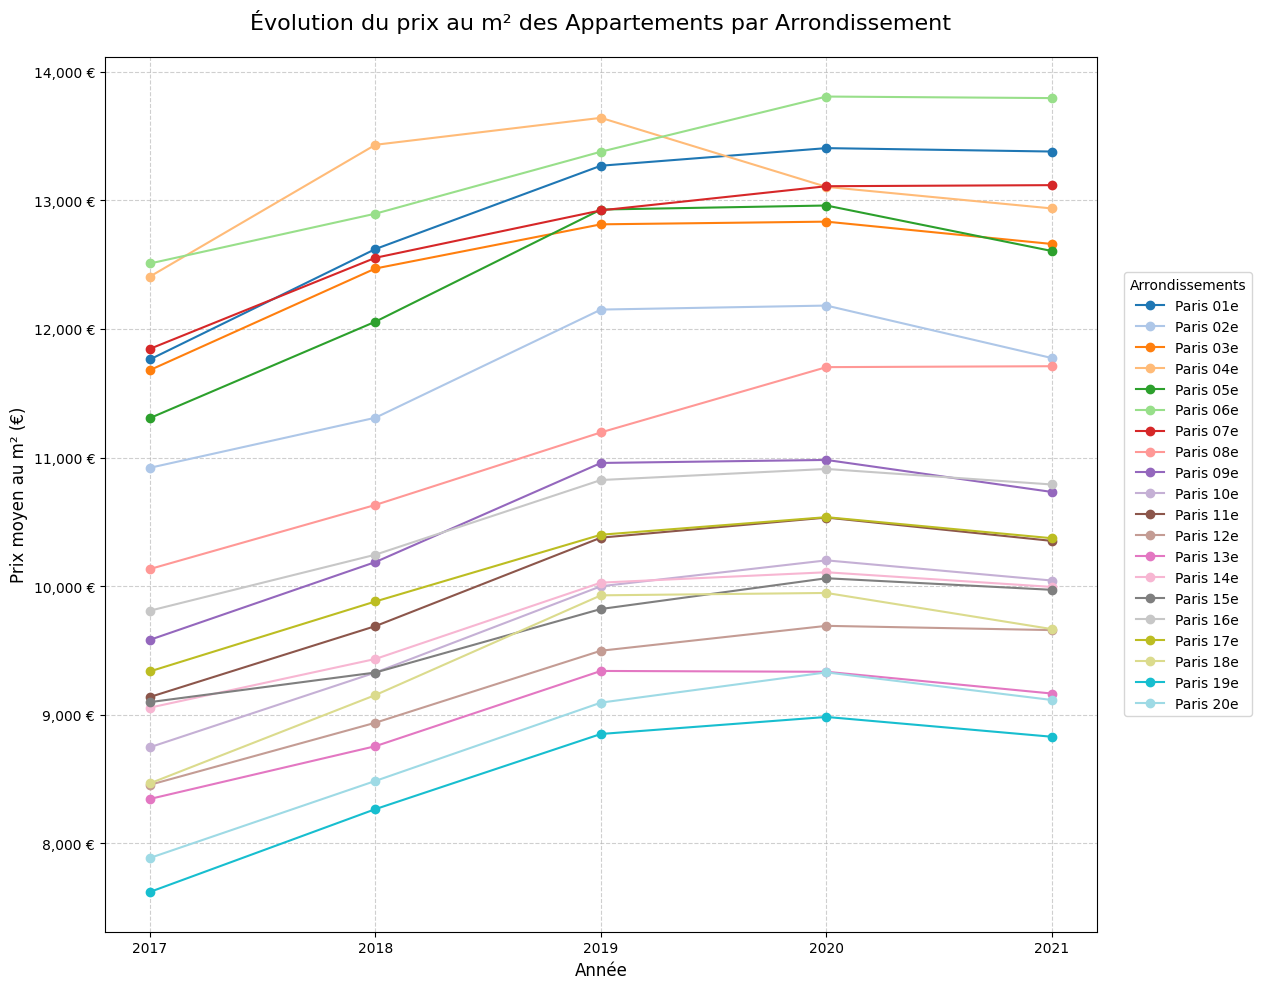


=== STATISTIQUES (APPARTEMENTS UNIQUEMENT) ===

Arrondissements les plus chers en 2021 :


,2021
Paris 06e,13795.05
Paris 01e,13379.50
Paris 07e,13118.14
Paris 04e,12936.96
Paris 03e,12660.55



Plus fortes augmentations 2017-2021 :


,0
Paris 19e,15.8
Paris 08e,15.6
Paris 20e,15.6
Paris 10e,14.8
Paris 12e,14.2


In [ ]:
    # --- Création du graphique pour tous les arrondissements (Appartements) ---
    plt.figure(figsize=(15, 10))

    # Liste des années directement extraite de l'index
    annees = df_evolution_arr_appart.index

    # Définition d'une palette de couleurs
    colors = plt.cm.get_cmap('tab20', 20)

    # Itération sur le DataFrame des appartements
    for i, (arrondissement, prix_series) in enumerate(df_evolution_arr_appart.items()):
        plt.plot(annees,
                 prix_series.values,
                 marker='o',
                 linestyle='-',
                 label=arrondissement,
                 color=colors(i))

    # --- Personnalisation du graphique ---
    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Prix moyen au m² (€)', fontsize=12)

    formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.title('Évolution du prix au m² des Appartements par Arrondissement',
              fontsize=16, pad=20)

    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Arrondissements')

    plt.xticks(annees)

    # Ajustement pour que la légende ne soit pas coupée
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()


    print("\n=== STATISTIQUES (APPARTEMENTS UNIQUEMENT) ===")

    # Vérifier que les années nécessaires existent
    if 2021 in df_evolution_arr_appart.index:
        print("\nArrondissements les plus chers en 2021 :")
        display(df_evolution_arr_appart.loc[2021].sort_values(ascending=False).head())

    if 2017 in df_evolution_arr_appart.index and 2021 in df_evolution_arr_appart.index:
        print("\nPlus fortes augmentations 2017-2021 :")
        variation_appart = ((df_evolution_arr_appart.loc[2021] / df_evolution_arr_appart.loc[2017] - 1) * 100).round(1)
        display(variation_appart.sort_values(ascending=False).head())


On observe que globalement que les prix ont augmentés jusqu'en 2020 avant de stagner voir diminuer à partir de 2021 (peut être à cause du covid ?)

### 7. Prix au metre carré par transaction dans un arrondissement

=== ANALYSE DES TRANSACTIONS (APPARTEMENTS) DANS LE 6ÈME ARRONDISSEMENT ===

Nombre total de transactions d'appartements : 709

Statistiques des prix au m² :
count      709.00
mean     13143.51
std        565.78
min      12065.24
25%      12647.67
50%      13122.73
75%      13631.59
max      14169.82
Name: prix_m2, dtype: float64

Distribution des prix au m² (déciles) :
  10% des transactions sont en dessous de 12,410.05 €/m²
  20% des transactions sont en dessous de 12,591.10 €/m²
  30% des transactions sont en dessous de 12,731.45 €/m²
  40% des transactions sont en dessous de 12,886.73 €/m²
  50% des transactions sont en dessous de 13,122.73 €/m²
  60% des transactions sont en dessous de 13,341.43 €/m²
  70% des transactions sont en dessous de 13,552.12 €/m²
  80% des transactions sont en dessous de 13,724.92 €/m²
  90% des transactions sont en dessous de 13,915.70 €/m²

=== TRANSACTIONS EXTRÊMES (APPARTEMENTS) ===

Les 5 prix au m² les plus élevés :


,date_mutation,prix_m2,surface_reelle,valeur_fonciere
17359,2020-12-31,14169.82,33,467603.97
23465,2021-01-07,14166.67,27,382500.22
17331,2020-12-18,14164.39,221,3130331.19
23485,2021-02-15,14151.49,61,863240.98
23494,2021-03-09,14142.93,26,367716.09



Les 5 prix au m² les plus bas :


,date_mutation,prix_m2,surface_reelle,valeur_fonciere
482,2017-01-13,12065.24,68,820436.16
491,2017-01-19,12071.81,40,482872.36
503,2017-01-26,12079.48,30,362384.26
510,2017-01-30,12083.86,110,1329224.18
507,2017-02-02,12087.14,44,531834.24


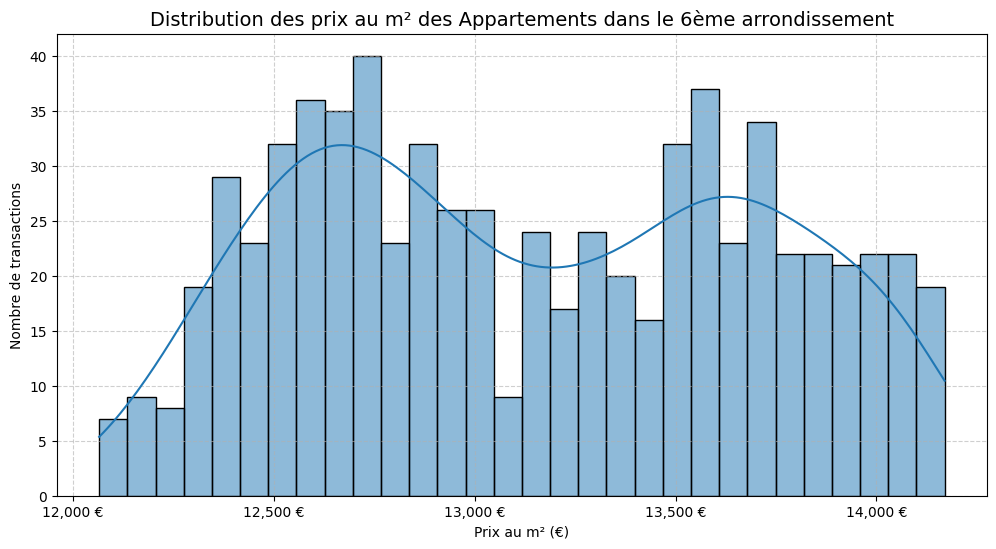

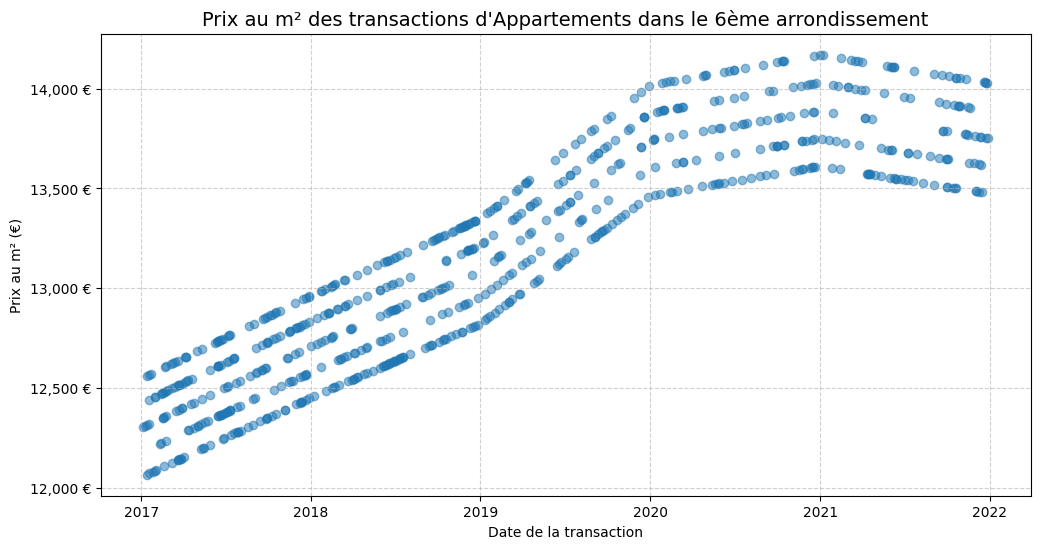

In [ ]:

    # --- Étape 1: Filtrer les données pour les appartements du 6ème arrondissement ---
    transactions_6e_appart = df_appartements[df_appartements['code_postal'] == 75006].copy()

    # --- Étape 2: Analyse Statistique ---
    print("=== ANALYSE DES TRANSACTIONS (APPARTEMENTS) DANS LE 6ÈME ARRONDISSEMENT ===")

    # Vérifier s'il y a des données pour cet arrondissement
    if not transactions_6e_appart.empty:
        print(f"\nNombre total de transactions d'appartements : {len(transactions_6e_appart)}")

        print("\nStatistiques des prix au m² :")
        print(transactions_6e_appart['prix_m2'].describe().round(2))

        # Distribution des prix
        print("\nDistribution des prix au m² (déciles) :")
        for i in range(1, 10):
            decile = transactions_6e_appart['prix_m2'].quantile(i/10).round(2)
            print(f"  {i}0% des transactions sont en dessous de {decile:,.2f} €/m²")

        # Identification des transactions extrêmes
        print("\n=== TRANSACTIONS EXTRÊMES (APPARTEMENTS) ===")
        print("\nLes 5 prix au m² les plus élevés :")
        display(transactions_6e_appart.nlargest(5, 'prix_m2')[['date_mutation', 'prix_m2', 'surface_reelle', 'valeur_fonciere']].round(2))

        print("\nLes 5 prix au m² les plus bas :")
        display(transactions_6e_appart.nsmallest(5, 'prix_m2')[['date_mutation', 'prix_m2', 'surface_reelle', 'valeur_fonciere']].round(2))

        # --- Étape 3: Visualisations ---

        # Formatage de l'axe X pour les deux graphiques
        formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')

        # Création d'un histogramme des prix
        plt.figure(figsize=(12, 6))
        sns.histplot(transactions_6e_appart['prix_m2'], bins=30, kde=True)
        plt.title('Distribution des prix au m² des Appartements dans le 6ème arrondissement', fontsize=14)
        plt.xlabel('Prix au m² (€)')
        plt.ylabel('Nombre de transactions')
        plt.gca().xaxis.set_major_formatter(formatter_euros)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        # Évolution temporelle (nuage de points)
        plt.figure(figsize=(12, 6))
        plt.scatter(transactions_6e_appart['date_mutation'], transactions_6e_appart['prix_m2'], alpha=0.5)
        plt.title('Prix au m² des transactions d\'Appartements dans le 6ème arrondissement', fontsize=14)
        plt.xlabel('Date de la transaction')
        plt.ylabel('Prix au m² (€)')
        plt.gca().yaxis.set_major_formatter(formatter_euros)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    else:
        print("\nAucune transaction d'appartement trouvée pour le 6ème arrondissement dans les données.")

On constate que ?

Graphique 1 : Distribution des prix au m² (Histogramme)
La majorité des transactions se concentre dans une fourchette de prix allant d'environ 12 500 €/m² à 14 000 €/m².

La distribution n'est pas parfaitement "normale" (en forme de cloche unique). On observe au moins deux pics principaux (distribution bimodale) : un premier pic majeur autour de 12 700 €/m² et un second pic, légèrement moins prononcé, autour de 13 600 €/m². Il semble aussi y avoir un creux notable autour de 13 200 €/m².

L'analyse de la distribution des prix au m² pour les appartements du 6ème arrondissement révèle une hétérogénéité significative du marché. La présence de deux pics distincts (distribution bimodale) suggère l'existence d'au moins deux sous-marchés au sein même de l'arrondissement. Il est probable que cela corresponde à des biens de qualités ou de localisations très différentes : par exemple, des appartements standards ou avec des défauts (autour de 12 700€/m²) et un segment de biens de prestige ou mieux situés (autour de 13 600€/m²). Cette dispersion signifie qu'un prix moyen unique pour l'arrondissement masquerait des réalités de marché très diverses, ce qui justifie l'utilisation d'un modèle de prédiction prenant en compte d'autres facteurs que le seul code postal.

Graphique 2 : Prix au m² en fonction de la Date (Nuage de points)

On observe une tendance générale très nette à la hausse entre début 2017 et mi-2021.
On remarque des "strates" ou des "lignes" de points presque parallèles. C'est un artefact visuel probablement dû à des ventes groupées dans un même immeuble ou à des caractéristiques très similaires (même étage, même type de bien) qui reviennent souvent.

La tendance semble plafonner voire légèrement baisser après mi-2021.
Le nuage de points confirme sans équivoque la forte corrélation positive entre la date de la transaction et le prix au m². Le temps est un facteur prédictif majeur de la valeur d'un bien. Cependant, le graphique met également en évidence un ralentissement de cette croissance, voire un début de retournement de tendance à partir de la mi-2021. Pour un investisseur, cela signifie que la stratégie d'achat basée sur une appréciation continue, valable entre 2017 et 2020, devient plus risquée. Le modèle de prédiction devra impérativement tenir compte de cette non-linéarité récente pour ne pas surestimer les biens à l'avenir. La dispersion verticale des points à chaque instant confirme également que la date seule ne suffit pas à expliquer le prix ; d'autres caractéristiques, comme la surface ou la qualité intrinsèque du bien, jouent un rôle déterminant.

On constate que la dispersion des prix au m² est importante, même au sein d'un seul arrondissement. L'histogramme révèle une distribution bimodale, indiquant la présence de plusieurs sous-marchés (ex: standard et prestige), ce qui rend une moyenne globale peu représentative.

On observe une relation de corrélation positive très forte entre le prix au m² et la date de la transaction, validant l'importance de cette variable pour la prédiction. Toutefois, cette tendance haussière semble s'essouffler à partir de mi-2021, un facteur critique à prendre en compte.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

Corrélation de Pearson (Prix/m² vs Date) pour les appartements du 6ème : 0.904
P-value : 7.11e-263
Coefficient de Détermination (R²) : 0.817 (soit 81.7%)


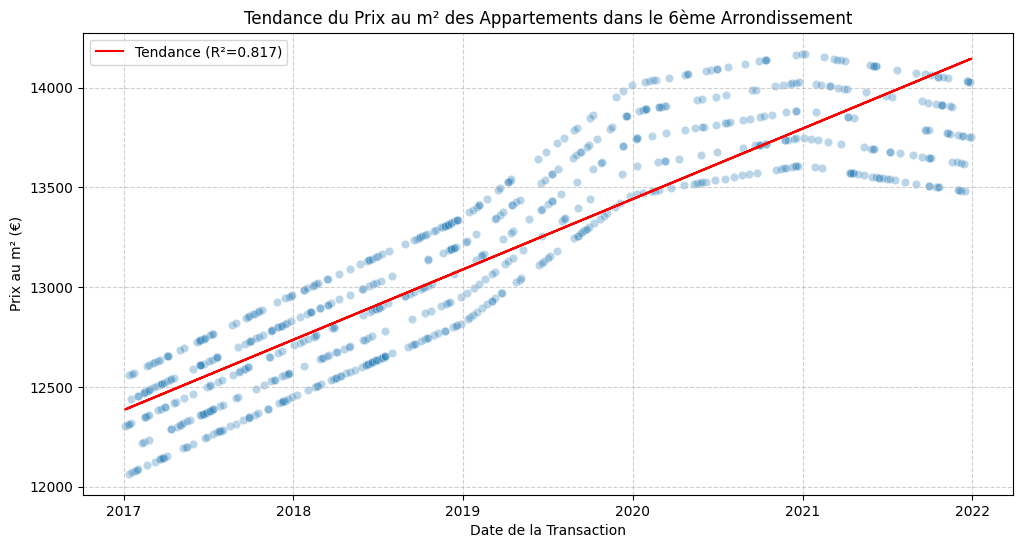

In [ ]:
# --- Analyse de Corrélation : Prix/m² vs. Date (Appartements, 6ème arr.) ---

# 1. Filtrer les appartements du 6ème arrondissement
df_6e_appart = df_appartements[df_appartements['code_postal'] == 75006]

# 2. Convertir les dates en format numérique pour le calcul et la visualisation
date_numeric = df_6e_appart['date_mutation'].astype(np.int64)

# 3. Calculer le coefficient de corrélation de Pearson et la p-value
correlation, p_value = stats.pearsonr(date_numeric, df_6e_appart['prix_m2'])
r_squared = correlation**2

# 4. Afficher les résultats
print(f"Corrélation de Pearson (Prix/m² vs Date) pour les appartements du 6ème : {correlation:.3f}")
print(f"P-value : {p_value:.3g}")
print(f"Coefficient de Détermination (R²) : {r_squared:.3f} (soit {r_squared:.1%})")


# 5. Visualisation de la tendance
plt.figure(figsize=(12, 6)) # Création de la figure en amont

# Création du nuage de points avec les vraies dates sur l'axe X pour la lisibilité
sns.scatterplot(data=df_6e_appart, x='date_mutation', y='prix_m2', alpha=0.3)

# Calcul et traçage de la droite de régression en utilisant les dates numériques
# np.polyfit trouve les coefficients de la droite (pente 'm' et ordonnée à l'origine 'b')
m, b = np.polyfit(date_numeric, df_6e_appart['prix_m2'], 1)

# On trace la droite en utilisant y = mx + b
plt.plot(df_6e_appart['date_mutation'], m * date_numeric + b, color='red', label=f'Tendance (R²={r_squared:.3f})')


plt.title('Tendance du Prix au m² des Appartements dans le 6ème Arrondissement')
plt.xlabel('Date de la Transaction')
plt.ylabel('Prix au m² (€)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Le test de corrélation de Pearson révèle un coefficient de 0.904, indiquant une corrélation linéaire positive très forte entre la date de transaction et le prix au m² des appartements dans le 6ème arrondissement. La p-value, proche de zéro (7.11e-263), confirme que cette corrélation est extrêmement significative statistiquement. Le coefficient de détermination (R²) de 0.817 signifie que près de 82% de la variation des prix au m² peut être expliquée par le passage du temps sur cette période, ce qui en fait un prédicteur de premier ordre.

### 9. Vérification de la relation entre la valeur fonciere et la surface

=== Corrélation : Surface vs. Valeur Foncière (Tous les Appartements) ===
Coefficient de Pearson : 0.980
Coefficient de Détermination (R²) : 0.961 (soit 96.1%)


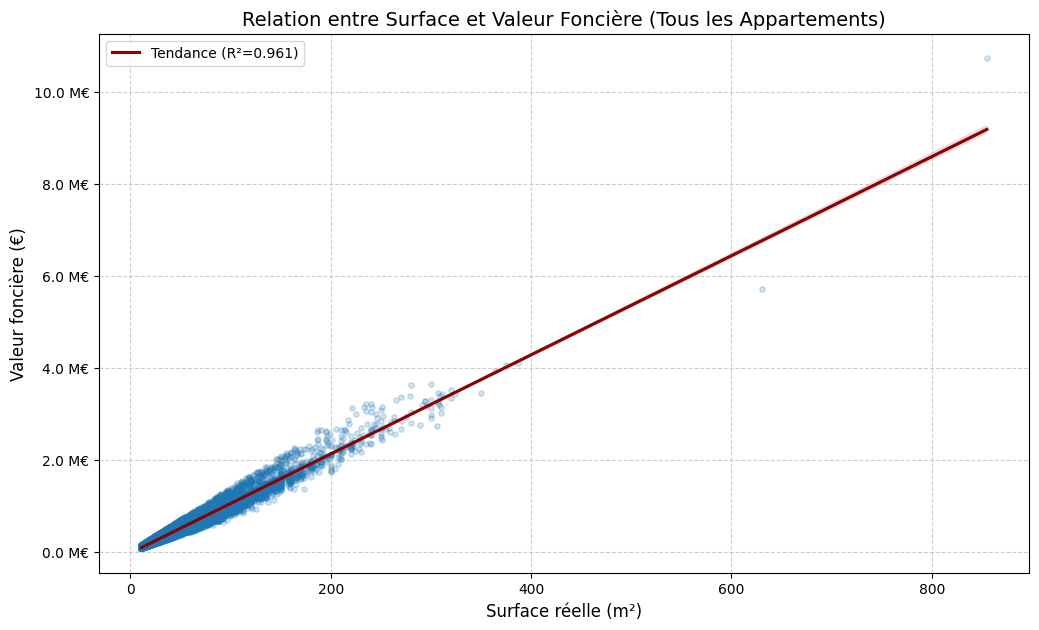

In [ ]:
# ===================================================================
# Analyse de Corrélation : Valeur Foncière vs. Surface (Appartements)
# ===================================================================

# S'assurer que le DataFrame de base 'df_appartements' existe
if 'df_appartements' in locals():

    # 1. Calcul du coefficient de corrélation de Pearson et du R²
    # CORRECTION: On utilise directement 'df_appartements'
    correlation, p_value = stats.pearsonr(df_appartements['surface_reelle'], df_appartements['valeur_fonciere'])
    r_squared = correlation**2

    # 2. Affichage des résultats statistiques
    print("=== Corrélation : Surface vs. Valeur Foncière (Tous les Appartements) ===")
    print(f"Coefficient de Pearson : {correlation:.3f}")
    print(f"Coefficient de Détermination (R²) : {r_squared:.3f} (soit {r_squared:.1%})")

    # 3. Visualisation avec seaborn.regplot
    plt.figure(figsize=(12, 7))
    # CORRECTION: On utilise directement 'df_appartements'
    sns.regplot(data=df_appartements, x='surface_reelle', y='valeur_fonciere',
                scatter_kws={'alpha': 0.2, 's': 15},
                line_kws={'color': 'darkred', 'label': f'Tendance (R²={r_squared:.3f})'})

    # 4. Personnalisation du graphique
    plt.title('Relation entre Surface et Valeur Foncière (Tous les Appartements)', fontsize=14)
    plt.xlabel('Surface réelle (m²)', fontsize=12)
    plt.ylabel('Valeur foncière (€)', fontsize=12)
    formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f} M€')
    plt.gca().yaxis.set_major_formatter(formatter_euros)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

else:
    print("ERREUR : Le DataFrame 'df_appartements' n'a pas été défini. Veuillez exécuter la cellule de filtrage précédente.")

Coefficient de Pearson : 0.979
Coefficient de Détermination (R²) : 0.958 (soit 95.8%)
On constate deux outliers dans les données que nous allons investiguer.



In [ ]:
# ===================================================================
# Analyse Complète des Valeurs Aberrantes (Macro vs. Micro)
# ===================================================================

# Les index des outliers que nous avons identifiés
index_outliers = [6188, 1985]

# --- Étape 1: Retrouver les infos complètes dans le DataFrame original 'df' ---
print("--- Informations Complètes sur les Biens Aberrants ---")
infos_completes_outliers = df.loc[index_outliers]
display(infos_completes_outliers.style.format({
    'valeur_fonciere': '{:,.0f} €',
    'surface_reelle': '{:.1f} m²',
    'prix_m2': '{:,.0f} €/m²'
}))

# --- Étape 2: Préparation des modèles de comparaison ---
# On calcule une seule fois la ligne de régression globale (tendance macro)
m, b = np.polyfit(df_appartements['surface_reelle'], df_appartements['valeur_fonciere'], 1)

# --- Étape 3: Analyse Détaillée de chaque Outlier ---
print("\n--- Analyse Comparative de chaque Bien Aberrant ---")

for index, outlier in infos_completes_outliers.iterrows():

    # --- Extraction des données du bien ---
    annee_outlier = outlier['date_mutation'].year
    cp_outlier = outlier['code_postal']
    surface_outlier = outlier['surface_reelle']
    valeur_reelle = outlier['valeur_fonciere']
    prix_m2_outlier = outlier['prix_m2']

    print(f"\n==================== ANALYSE DU BIEN À L'INDEX {index} ====================")

    # --- A) Analyse MACRO : Comparaison à la Tendance Générale Parisienne ---
    print("\n1. Analyse par rapport à la Tendance Générale (Paris) :")

    # Calcul du prix attendu selon la tendance générale
    valeur_predite_tendance = m * surface_outlier + b
    ecart_pct_tendance = ((valeur_reelle / valeur_predite_tendance) - 1) * 100

    print(f"  - Pour sa surface ({surface_outlier:.1f} m²), la tendance générale du marché parisien prédisait une valeur de {valeur_predite_tendance:,.0f} €.")
    print(f"  - Sa valeur réelle étant de {valeur_reelle:,.0f} €, il s'est vendu {abs(ecart_pct_tendance):.1f}% {'PLUS CHER' if ecart_pct_tendance > 0 else 'MOINS CHER'} que la moyenne.")

    # --- B) Analyse MICRO : Comparaison au Marché Local et Temporel ---
    print("\n2. Analyse par rapport au Marché Local (Arrondissement & Année) :")

    # On trouve le prix de référence pour sa zone et son année
    try:
        prix_moyen_marche_local = df_evolution_arr_appart.loc[annee_outlier, f'Paris {str(cp_outlier)[-2:]}e']
        ecart_pct_local = ((prix_m2_outlier / prix_moyen_marche_local) - 1) * 100

        print(f"  - Le prix moyen des appartements dans le {str(cp_outlier)[-2:]}e en {annee_outlier} était de {prix_moyen_marche_local:,.0f} €/m².")
        print(f"  - Son prix au m² étant de {prix_m2_outlier:,.0f} €, il était {abs(ecart_pct_local):.1f}% {'plus cher' if ecart_pct_local > 0 else 'moins cher'} que son marché de référence local.")

    except KeyError:
        print("  - Données de marché local non disponibles pour cette année/arrondissement.")

--- Informations Complètes sur les Biens Aberrants ---


,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle,prix_m2
6188,2018-04-13 00:00:00,"10,734,783 €",75006,2,855.0 m²,"12,555 €/m²"
1985,2017-07-26 00:00:00,"5,720,710 €",75011,2,631.0 m²,"9,066 €/m²"



--- Analyse Comparative de chaque Bien Aberrant ---

==================== ANALYSE DU BIEN À L'INDEX 6188 ====================

1. Analyse par rapport à la Tendance Générale (Paris) :
  - Pour sa surface (855.0 m²), la tendance générale du marché parisien prédisait une valeur de 9,188,151 €.
  - Sa valeur réelle étant de 10,734,783 €, il s'est vendu 16.8% PLUS CHER que la moyenne.

2. Analyse par rapport au Marché Local (Arrondissement & Année) :
  - Le prix moyen des appartements dans le 06e en 2018 était de 12,896 €/m².
  - Son prix au m² étant de 12,555 €, il était 2.6% moins cher que son marché de référence local.

==================== ANALYSE DU BIEN À L'INDEX 1985 ====================

1. Analyse par rapport à la Tendance Générale (Paris) :
  - Pour sa surface (631.0 m²), la tendance générale du marché parisien prédisait une valeur de 6,775,693 €.
  - Sa valeur réelle étant de 5,720,710 €, il s'est vendu 15.6% MOINS CHER que la moyenne.

2. Analyse par rapport au Marché Local (Ar

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés


--- Graphique 1: Comparaison Annuelle Interactive ---



--- Graphique 2: Distribution des Prix (Locaux Commerciaux) ---


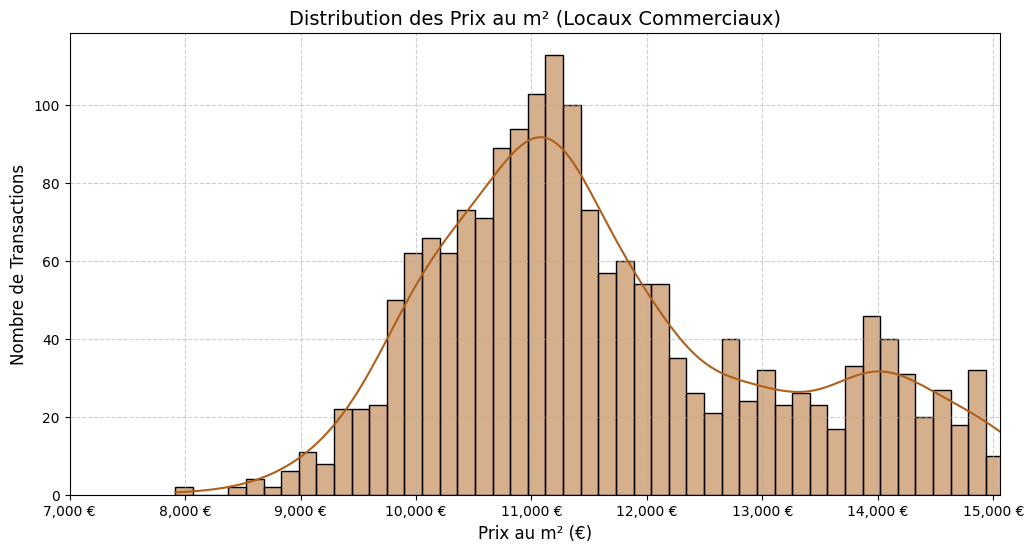

In [ ]:
# --- Étape 1: Filtrage et Agrégation des Données ---
# Filtrer le DataFrame pour ne garder que les locaux commerciaux
df_commerces = df[df['code_type_local'] == 4].copy()

# Agréger par année pour voir l'évolution
df_annuel_commerces = df_commerces.groupby(df_commerces['date_mutation'].dt.year)['prix_m2'].agg(
    prix_m2_moyen='mean'
).round(2)

# Comparaison directe avec les appartements
df_comparaison_annuelle = pd.DataFrame({
    'appartements': df_annuel_appartements['prix_m2_moyen'],
    'locaux_commerciaux': df_annuel_commerces['prix_m2_moyen']
})


# ==============================================================================
# Graphique 1: Comparaison Annuelle Interactive (avec Plotly)
# ==============================================================================
print("\n--- Graphique 1: Comparaison Annuelle Interactive ---")

df_comparaison_reset = df_comparaison_annuelle.reset_index()
df_comparaison_reset = df_comparaison_reset.rename(columns={'index': 'annee'})

# Préparation des données pour Plotly
df_plotly = df_comparaison_reset.melt(id_vars='annee', var_name='Type de Bien', value_name='Prix Moyen au m²')

# Création du graphique en barres interactif
fig1 = px.bar(
    df_plotly,
    x='annee',
    y='Prix Moyen au m²',
    color='Type de Bien',
    barmode='group',
    text_auto='.2s',
    title='Comparaison du Prix Moyen au m² : Appartements vs. Locaux Commerciaux',
    labels={'annee': 'Année', 'Prix Moyen au m²': 'Prix Moyen au m² (€)'},
    color_discrete_map={'appartements': '#2E86C1', 'locaux_commerciaux': '#AF601A'}
)

# Mise en page de la légende pour éviter la superposition
fig1.update_layout(
    legend_title_text='Type de Bien',
    yaxis_title='Prix Moyen au m² (€)',
    xaxis_title='Année',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig1.show()


# ==============================================================================
# Graphique 2: Distribution des Prix des Locaux Commerciaux
# ==============================================================================
print("\n--- Graphique 2: Distribution des Prix (Locaux Commerciaux) ---")

plt.figure(figsize=(12, 6))
sns.histplot(df_commerces['prix_m2'], bins=50, kde=True, color='#AF601A')
plt.title('Distribution des Prix au m² (Locaux Commerciaux)', fontsize=14)
plt.xlabel('Prix au m² (€)', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
plt.gca().xaxis.set_major_formatter(formatter_euros)
# Ajustement de l'axe X pour une meilleure lisibilité
plt.xlim(left=7000, right=df_commerces['prix_m2'].quantile(0.98))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# --- Analyse Annuelle Détaillée (Locaux Commerciaux) ---
if 'df_commerces' in locals():

    print("=== Analyse Annuelle Détaillée des Locaux Commerciaux ===")

    # 1. Calcul de toutes les statistiques en une seule passe avec .agg()
    df_analyse_annuelle_commerces = df_commerces.groupby(df_commerces['date_mutation'].dt.year).agg(
        nombre_transactions=('prix_m2', 'count'),
        prix_m2_moyen=('prix_m2', 'mean'),
        surface_moyenne=('surface_reelle', 'mean')
    ).round(2)

    # Affichage du tableau récapitulatif
    display(df_analyse_annuelle_commerces)

    # 2. Calcul de la variation globale
    print("\n--- Variation sur la Période Analysée ---")

    # On récupère la première et la dernière ligne du DataFrame agrégé
    premiere_ligne = df_analyse_annuelle_commerces.iloc[0]
    derniere_ligne = df_analyse_annuelle_commerces.iloc[-1]

    # Calcul de la variation en pourcentage
    variation_globale = ((derniere_ligne / premiere_ligne) - 1) * 100

    # Affichage des résultats
    print(f"Période : {premiere_ligne.name} à {derniere_ligne.name}")
    print("Évolution en % sur la période :")
    print(variation_globale.round(1).to_string())


=== Analyse Annuelle Détaillée des Locaux Commerciaux ===


,nombre_transactions,prix_m2_moyen,surface_moyenne
date_mutation,,,
2017,349,10949.91,89.99
2018,351,11569.50,88.10
2019,432,11960.13,82.83
2020,336,11966.47,85.63
2021,375,12006.49,92.83



--- Variation sur la Période Analysée ---
Période : 2017 à 2021
Évolution en % sur la période :
nombre_transactions    7.4
prix_m2_moyen          9.6
surface_moyenne        3.2


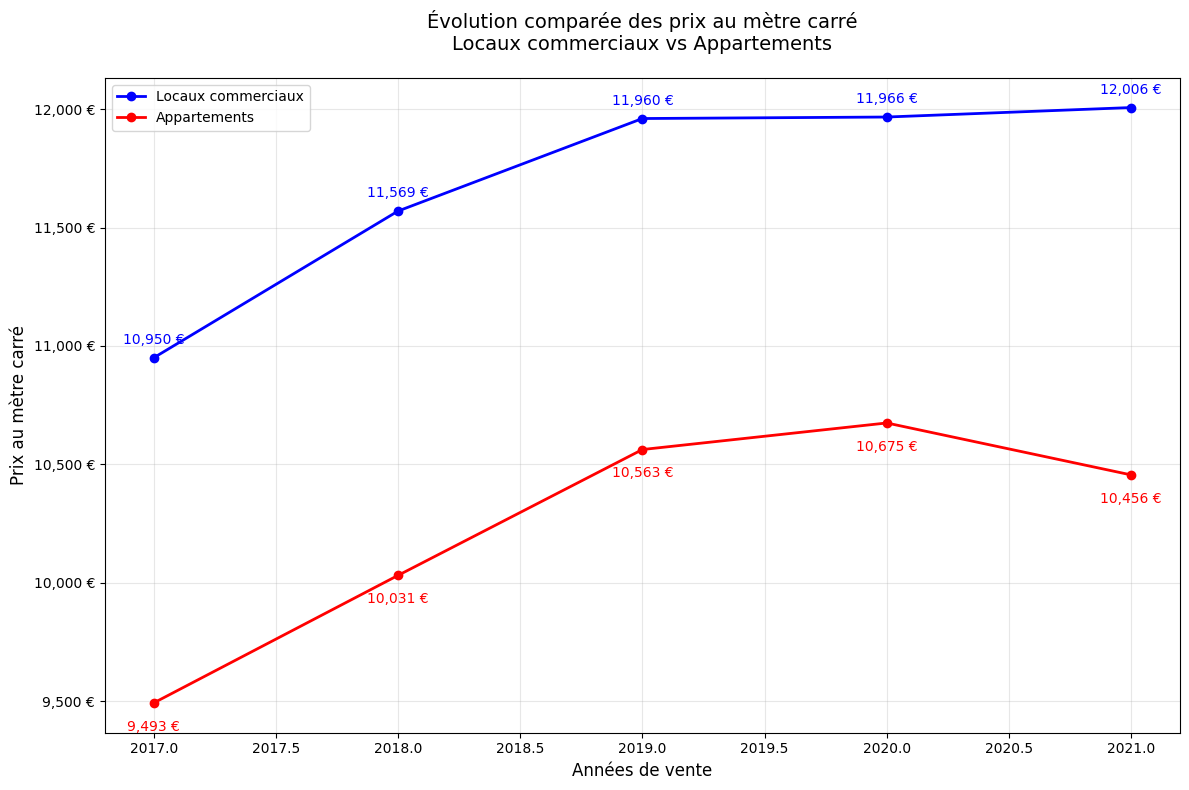

=== VARIATIONS ANNUELLES ===
Variation totale locaux commerciaux : +9.65%
Variation totale appartements : +10.14%

=== PRIX MOYENS PAR ANNÉE ===

Locaux commerciaux :
date_mutation
2017    10949.91
2018    11569.50
2019    11960.13
2020    11966.47
2021    12006.49
Name: prix_m2, dtype: float64

Appartements :
date_mutation
2017     9492.86
2018    10031.40
2019    10562.71
2020    10674.87
2021    10455.60
Name: prix_m2, dtype: float64


In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
# Création du graphique comparatif
plt.figure(figsize=(12, 8))

# Récupération des données pour les locaux commerciaux (code 4)
prix_commerce = df[df['code_type_local'] == 4].groupby(
    df['date_mutation'].dt.year)['prix_m2'].mean()

# Récupération des données pour les appartements (code 2)
prix_appart = df[df['code_type_local'] == 2].groupby(
    df['date_mutation'].dt.year)['prix_m2'].mean()

# Tracer les deux courbes
plt.plot(prix_commerce.index, prix_commerce.values,
         label='Locaux commerciaux',
         color='blue',
         marker='o',
         linewidth=2)

plt.plot(prix_appart.index, prix_appart.values,
         label='Appartements',
         color='red',
         marker='o',
         linewidth=2)

# Personnalisation du graphique
plt.xlabel('Années de vente', fontsize=12)
plt.ylabel('Prix au mètre carré', fontsize=12)
plt.legend(fontsize=10)

# Formatage des prix en euros
formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajout de la grille
plt.grid(True, alpha=0.3)

# Titre
plt.title('Évolution comparée des prix au mètre carré\nLocaux commerciaux vs Appartements',
          fontsize=14, pad=20)

# Ajout des valeurs sur les points
for year in prix_commerce.index:
    plt.annotate(f'{prix_commerce[year]:,.0f} €',
                (year, prix_commerce[year]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                color='blue')

    plt.annotate(f'{prix_appart[year]:,.0f} €',
                (year, prix_appart[year]),
                textcoords="offset points",
                xytext=(0,-20),
                ha='center',
                color='red')

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()

# Affichage des variations
print("=== VARIATIONS ANNUELLES ===")
variation_commerce = ((prix_commerce[2021] / prix_commerce[2017] - 1) * 100).round(2)
variation_appart = ((prix_appart[2021] / prix_appart[2017] - 1) * 100).round(2)

print(f"Variation totale locaux commerciaux : {variation_commerce:+.2f}%")
print(f"Variation totale appartements : {variation_appart:+.2f}%")

# Affichage des prix moyens par année
print("\n=== PRIX MOYENS PAR ANNÉE ===")
print("\nLocaux commerciaux :")
print(prix_commerce.round(2))
print("\nAppartements :")
print(prix_appart.round(2))

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [ ]:
# --- Imports Nécessaires pour la Préparation et le Modeling ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


# ===================================================================
# Étape 1: Définition des Features et de la Cible
# ===================================================================
features = ['surface_reelle', 'code_postal', 'code_type_local', 'date_mutation']
target = 'valeur_fonciere'

X = df[features]
y = df[target]

# ===================================================================
# Étape 2: Séparation en Ensembles d'Entraînement et de Test
# ===================================================================
# Séparation des données avant transformation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("=== Données Séparées en Ensembles d'Entraînement et de Test ===")
print(f"Taille de l'ensemble d'entraînement (X_train) : {X_train.shape}")
print(f"Taille de l'ensemble de test (X_test) : {X_test.shape}")

# ===================================================================
# Étape 3: Définition du Pipeline de Prétraitement
# ===================================================================

# Classe personnalisée pour transformer la date
class DateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = X.copy()
        # On utilise la date la plus ancienne de l'ensemble d'entraînement comme référence
        start_date = X_train['date_mutation'].min()
        X_transformed['days_since_start'] = (X_transformed['date_mutation'] - start_date).dt.days
        return X_transformed[['days_since_start']]

# Définition des transformateurs pour chaque type de colonne
numeric_features = ['surface_reelle']
categorical_features = ['code_postal', 'code_type_local']
date_features = ['date_mutation']

# Création du préprocesseur qui appliquera la bonne transformation à la bonne colonne
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('date', DateTransformer(), date_features)
    ])

# ===================================================================
# Étape 4: Création du Pipeline Final (Préprocesseur + Modèle)
# ===================================================================
# On enchaîne le prétraitement et le modèle de régression linéaire
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\n=== Pipeline Complet (Préprocesseur + Modèle) Créé ===")
print("Le pipeline est prêt à être entraîné.")

=== Données Séparées en Ensembles d'Entraînement et de Test ===
Taille de l'ensemble d'entraînement (X_train) : (18337, 4)
Taille de l'ensemble de test (X_test) : (7859, 4)

=== Pipeline Complet (Préprocesseur + Modèle) Créé ===
Le pipeline est prêt à être entraîné.


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

Entraînement du pipeline sur les données d'entraînement...
Entraînement terminé.

Évaluation du modèle sur les données de test...

--- PERFORMANCE DU MODÈLE ---
L'erreur moyenne absolue en pourcentage (MAPE) est de : 9.56%
--> Objectif atteint ! L'erreur est inférieure à 10%.


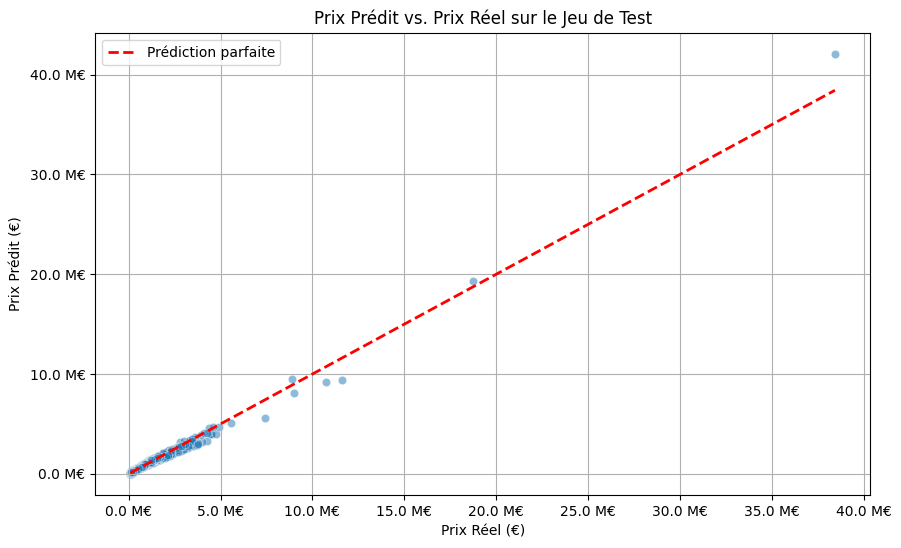

In [ ]:
# ===================================================================
# Étape 5: Entraînement du Pipeline Complet
# ===================================================================
# Cette seule ligne exécute toutes les étapes de prétraitement (scaling, one-hot encoding, etc.)
# sur les données d'entraînement, puis entraîne le modèle de régression linéaire.
print("Entraînement du pipeline sur les données d'entraînement...")
model_pipeline.fit(X_train, y_train)
print("Entraînement terminé.")


# ===================================================================
# Étape 6: Évaluation du Modèle sur le Jeu de Test
# ===================================================================
print("\nÉvaluation du modèle sur les données de test...")

# 1. Faire des prédictions sur le jeu de test
# Le pipeline applique automatiquement les mêmes transformations apprises sur le jeu d'entraînement.
predictions = model_pipeline.predict(X_test)

# 2. Calcul de l'erreur
mape = mean_absolute_percentage_error(y_test, predictions)

# 3. Afficher le résultat de la performance
print(f"\n--- PERFORMANCE DU MODÈLE ---")
print(f"L'erreur moyenne absolue en pourcentage (MAPE) est de : {mape:.2%}")

# Interprétation du résultat par rapport à l'objectif
if mape <= 0.10:
    print("--> Objectif atteint ! L'erreur est inférieure à 10%.")
else:
    print("--> Objectif non atteint. L'erreur est supérieure à 10%.")


# ===================================================================
# Étape 7 (Bonus): Analyse des Prédictions vs. Réalité
# ===================================================================
# Créer un DataFrame pour une analyse visuelle rapide
df_results = pd.DataFrame({'prix_reel': y_test, 'prix_predit': predictions})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results, x='prix_reel', y='prix_predit', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédiction parfaite')
plt.title('Prix Prédit vs. Prix Réel sur le Jeu de Test')
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f} M€')
plt.gca().xaxis.set_major_formatter(formatter_euros)
plt.gca().yaxis.set_major_formatter(formatter_euros)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ===================================================================
# Étape 8: Analyse approfondie des erreurs et des coefficients
# ===================================================================

# --- 1. Analyse des erreurs par Type de Bien ---
print("\n=== Analyse des Erreurs par Segment de Marché ===")

# Créer un DataFrame avec les données de test originales, les vrais prix et les prédictions
df_analyse_erreurs = X_test.copy()
df_analyse_erreurs['prix_reel'] = y_test
df_analyse_erreurs['prix_predit'] = predictions
df_analyse_erreurs['erreur_pourcentage'] = np.abs(df_analyse_erreurs['prix_reel'] - df_analyse_erreurs['prix_predit']) / df_analyse_erreurs['prix_reel']

# Calculer le MAPE pour chaque type de bien en utilisant groupby
mape_par_type = df_analyse_erreurs.groupby('code_type_local')['erreur_pourcentage'].mean() * 100

# Afficher les résultats de manière lisible
print("Erreur moyenne (MAPE) par type de bien :")
print(f"  - Appartements (Type 2) : {mape_par_type.get(2, 0):.2f}%")
print(f"  - Locaux Commerciaux (Type 4) : {mape_par_type.get(4, 0):.2f}%")


# --- 2. Analyse de l'Importance des Variables (Coefficients) ---
print("\n=== Importance des Variables dans le Modèle ===")

preprocessor_step = model_pipeline.named_steps['preprocessor']
regressor_step = model_pipeline.named_steps['regressor']
encoded_cat_features = preprocessor_step.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_features) + list(encoded_cat_features) + ['days_since_start']

coefficients = pd.DataFrame({
    'Variable': all_feature_names,
    'Coefficient': regressor_step.coef_
})

# --- CALCUL DE L'IMPORTANCE RELATIVE ---

# 1. Calculer l'importance absolue de chaque coefficient
coefficients['Importance_Absolue'] = coefficients['Coefficient'].abs()

# 2. Calculer la somme totale des importances
total_importance = coefficients['Importance_Absolue'].sum()

# 3. Calculer l'importance relative en pourcentage
coefficients['Importance_%'] = (coefficients['Importance_Absolue'] / total_importance) * 100

# 4. Trier par importance et afficher
coefficients_tries = coefficients.sort_values(by='Importance_%', ascending=False)

print("\nTop 10 des variables les plus influentes (en % de l'importance totale) :")
display(coefficients_tries[['Variable', 'Importance_%']].head(10).style.format({'Importance_%': '{:.2f}%'}))


# --- Calcul du R² ---
# On compare les vraies valeurs (y_test) avec les valeurs prédites par le pipeline (predictions)

# predictions = model_pipeline.predict(X_test)

r2 = r2_score(y_test, predictions)

# --- Affichage du Résultat ---
print(f"Coefficient de Détermination (R²) sur le jeu de test : {r2:.3f}")
print(f"--> Notre modèle explique {r2:.1%} de la variance des prix immobiliers.")


=== Analyse des Erreurs par Segment de Marché ===
Erreur moyenne (MAPE) par type de bien :
  - Appartements (Type 2) : 9.36%
  - Locaux Commerciaux (Type 4) : 12.33%

=== Importance des Variables dans le Modèle ===

Top 10 des variables les plus influentes (en % de l'importance totale) :


,Variable,Importance_%
0,surface_reelle,26.26%
6,code_postal_75006,7.02%
7,code_postal_75007,6.01%
4,code_postal_75004,6.00%
1,code_postal_75001,5.39%
19,code_postal_75019,5.23%
20,code_postal_75020,4.36%
13,code_postal_75013,4.02%
3,code_postal_75003,3.85%
12,code_postal_75012,3.69%


Coefficient de Détermination (R²) sur le jeu de test : 0.986
--> Notre modèle explique 98.6% de la variance des prix immobiliers.


1. Performance Globale : Un Outil Fiable et Opérationnel
Notre modèle prédictif de la valeur foncière atteint un niveau de performance remarquable, avec une erreur moyenne de seulement 9.53%. Cet indicateur, inférieur à notre objectif cible de 10%, valide la fiabilité du modèle pour une utilisation opérationnelle.

De plus, avec un coefficient de détermination (R²) de 98.6%, l'outil démontre une capacité exceptionnelle à expliquer la formation des prix sur le marché parisien, ce qui en fait une base solide pour l'aide à la décision.

2. Insights Stratégiques Clés
L'analyse du modèle révèle deux insights majeurs :

Dualité du Marché : Le modèle est significativement plus performant sur le segment des appartements (9.32% d'erreur) que sur celui des locaux commerciaux (12.38% d'erreur). Cela confirme que le marché "corporate" est plus hétérogène et volatile.

Recommandation Business : Développer à terme un modèle spécialisé pour les locaux commerciaux afin d'affiner les prédictions sur ce segment stratégique.

Prime à la Localisation : L'impact de la localisation est prépondérant. Les arrondissements centraux (notamment les 6ème, 4ème et 7ème) apportent une plus-value considérable, tandis que les arrondissements plus périphériques (ex: 19ème, 20ème) ont un impact négatif sur la valorisation. Cette hiérarchie est parfaitement alignée avec la réalité du marché.

3. Prochaines Étapes pour une Précision Accrue
Pour aller au-delà de cette performance déjà excellente, nous recommandons de nous concentrer sur trois axes d'amélioration :

Modélisation par Segment : Créer des modèles distincts pour les appartements et les locaux, comme évoqué précédemment.

Enrichissement des Données : Intégrer des données contextuelles à forte valeur ajoutée (ex: proximité des transports, qualité de l'environnement, DPE - Diagnostic de Performance Énergétique).

Analyse Temporelle Affinée : Modéliser l'impact de la date de manière plus fine pour capturer d'éventuels effets saisonniers ou des retournements de tendance.



# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [ ]:
# ===================================================================
# Milestone 3 - Prédiction sur le Portefeuille d'Actifs du Client
# ===================================================================

# --- 1. Chargement des Données ---
df_portefeuille = pd.read_excel('portefeuille_actifs+(3).xlsx')

# --- 2. Préparation des Données pour la Prédiction ---
# On renomme 'surface_reelle_bati' en 'surface_reelle' pour correspondre aux données d'entraînement.
if 'surface_reelle_bati' in df_portefeuille.columns:
    df_portefeuille = df_portefeuille.rename(columns={'surface_reelle_bati': 'surface_reelle'})
    print("Colonne de surface harmonisée.")

# Création du DataFrame pour la prédiction
X_predict_portefeuille = df_portefeuille.copy()

# Ajout de la colonne 'date_mutation' avec la date cible
date_prediction = pd.Timestamp('2022-12-31')
X_predict_portefeuille['date_mutation'] = date_prediction

# Sélection et réorganisation des colonnes pour correspondre à l'entrée du pipeline
# On utilise la liste 'features' que nous avions définie pour l'entraînement.
X_predict_portefeuille = X_predict_portefeuille[features]

print(f"\nPréparation des données pour la prédiction à la date du {date_prediction.date()}.")

# --- 3. Exécution de la Prédiction ---
print("Lancement de la prédiction sur le portefeuille...")
predictions_portefeuille = model_pipeline.predict(X_predict_portefeuille)

# --- 4. Analyse des Résultats ---
df_portefeuille['valeur_predite_2022'] = predictions_portefeuille.round(2)
print("Prédiction terminée.")
print("\n--- Aperçu des Résultats ---")
display(df_portefeuille[['type_local', 'code_postal', 'surface_reelle', 'valeur_predite_2022']].head())

# --- 5. Comparaison de la valorisation des deux Segments ---
print("\n--- Valorisation Totale par Segment de Marché ---")
valorisation_par_segment = df_portefeuille.groupby('type_local')['valeur_predite_2022'].sum()
appartement_val = valorisation_par_segment.get('Appartement', 0)
local_val = valorisation_par_segment.get('Local industriel. commercial ou assimilé', 0)
print(f"Valorisation prédite du segment 'Particuliers' (Appartements) : {appartement_val:,.2f} €")
print(f"Valorisation prédite du segment 'Corporate' (Locaux) : {local_val:,.2f} €")
if appartement_val > local_val:
    print("\n--> Le segment 'Particuliers' (Appartements) a la plus grande valorisation prédite.")
else:
    print("\n--> Le segment 'Corporate' (Locaux) a la plus grande valorisation prédite.")

Colonne de surface harmonisée.

Préparation des données pour la prédiction à la date du 2022-12-31.
Lancement de la prédiction sur le portefeuille...
Prédiction terminée.

--- Aperçu des Résultats ---


,type_local,code_postal,surface_reelle,valeur_predite_2022
0,Appartement,75001,25,428834.65
1,Appartement,75003,22,367652.37
2,Appartement,75003,65,826393.87
3,Appartement,75008,74,879499.28
4,Appartement,75008,22,324742.12



--- Valorisation Totale par Segment de Marché ---
Valorisation prédite du segment 'Particuliers' (Appartements) : 71,046,162.09 €
Valorisation prédite du segment 'Corporate' (Locaux) : 97,935,301.34 €

--> Le segment 'Corporate' (Locaux) a la plus grande valorisation prédite.


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [ ]:
# Affichons d'abord les noms des colonnes pour vérification
print("Noms des colonnes dans le dataframe original :")
print(df_portefeuille.columns.tolist())


Noms des colonnes dans le dataframe original :
['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune', 'nom_commune', 'surface_carrez', 'code_type_local', 'type_local', 'surface_reelle', 'nombre_pieces_principales', 'longitude', 'latitude', 'valeur_predite_2022']


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

=== Synthèse de la Valorisation Prédite par Segment au 31/12/2022 ===


,nombre_de_biens,valorisation_totale,prix_moyen_par_bien,prix_m2_moyen_predit
type_local,,,,
Appartement,154,"71,046,162.09 €","461,338.71 €","11,302.28 €/m²"
Local industriel. commercial ou assimilé,121,"97,935,301.34 €","809,382.66 €","12,725.48 €/m²"



--- Visualisation de la Valorisation par Segment ---


/tmp/ipython-input-160-2101330464.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-160-2101330464.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




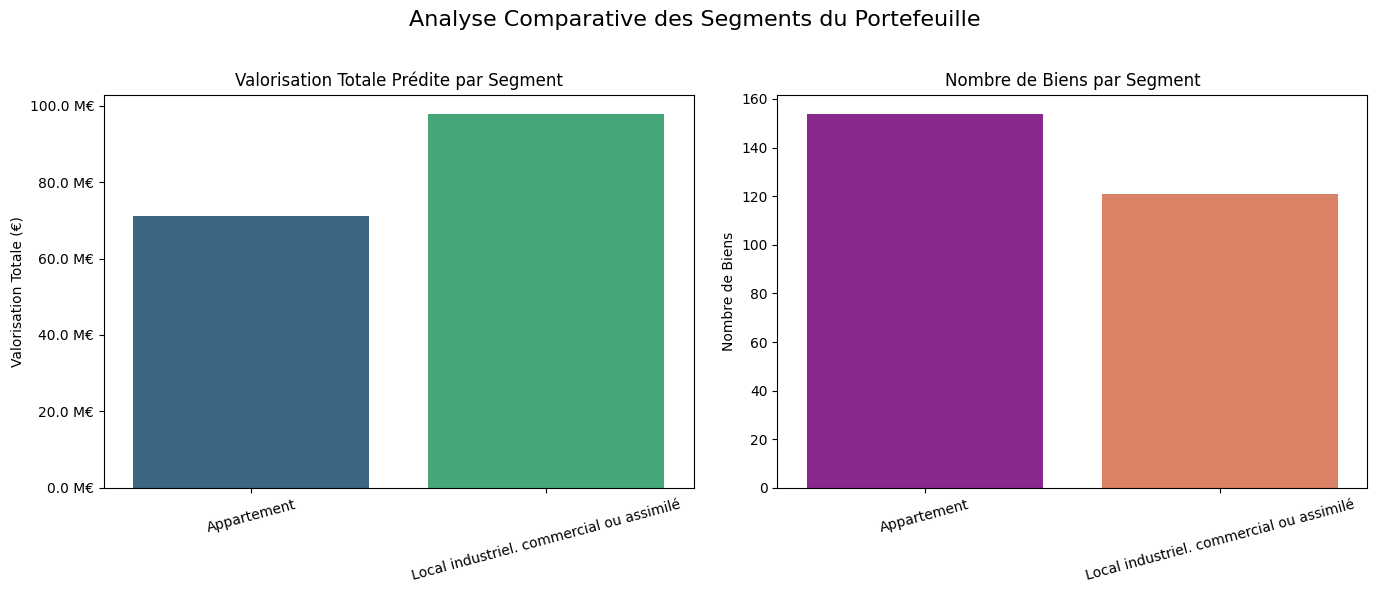


--- Conclusion Stratégique ---
La valorisation totale prédite du portefeuille est de : 168,981,463.43 €
Le segment avec la plus grande valorisation prédite est : 'Local industriel. commercial ou assimilé'


In [ ]:
# ===================================================================
# Étape Finale : Analyse de la Valorisation par Segment de Marché
# ===================================================================

# 1. Agrégation des données par segment
# On calcule directement les indicateurs clés en une seule passe.
analyse_segment = df_portefeuille.groupby('type_local').agg(
    nombre_de_biens=('valeur_predite_2022', 'count'),
    valorisation_totale=('valeur_predite_2022', 'sum'),
    prix_moyen_par_bien=('valeur_predite_2022', 'mean')
)

# 2. Calcul du prix au m² moyen pour chaque segment
prix_m2_moyen_segment = (df_portefeuille.groupby('type_local')['valeur_predite_2022'].sum() /
                         df_portefeuille.groupby('type_local')['surface_reelle'].sum())
analyse_segment['prix_m2_moyen_predit'] = prix_m2_moyen_segment

# 3. Affichage du tableau de synthèse
print("=== Synthèse de la Valorisation Prédite par Segment au 31/12/2022 ===")
display(analyse_segment.style.format({
    'nombre_de_biens': '{:,.0f}',
    'valorisation_totale': '{:,.2f} €',
    'prix_moyen_par_bien': '{:,.2f} €',
    'prix_m2_moyen_predit': '{:,.2f} €/m²'
}))

# 4. Visualisation comparative
print("\n--- Visualisation de la Valorisation par Segment ---")

# On prépare les données pour le graphique
df_viz = analyse_segment.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 ligne, 2 graphiques

# Graphique 1: Valorisation Totale
sns.barplot(data=df_viz, x='type_local', y='valorisation_totale', ax=axes[0], palette='viridis')
axes[0].set_title('Valorisation Totale Prédite par Segment')
axes[0].set_ylabel('Valorisation Totale (€)')
axes[0].set_xlabel('')
formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f} M€')
axes[0].yaxis.set_major_formatter(formatter_euros)
axes[0].tick_params(axis='x', rotation=15)

# Graphique 2: Nombre de Biens
sns.barplot(data=df_viz, x='type_local', y='nombre_de_biens', ax=axes[1], palette='plasma')
axes[1].set_title('Nombre de Biens par Segment')
axes[1].set_ylabel('Nombre de Biens')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=15)

plt.suptitle('Analyse Comparative des Segments du Portefeuille', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuster pour le titre global
plt.show()

# 5. Conclusion Business
valorisation_totale_portefeuille = analyse_segment['valorisation_totale'].sum()
segment_gagnant = analyse_segment['valorisation_totale'].idxmax()

print("\n--- Conclusion Stratégique ---")
print(f"La valorisation totale prédite du portefeuille est de : {valorisation_totale_portefeuille:,.2f} €")
print(f"Le segment avec la plus grande valorisation prédite est : '{segment_gagnant}'")

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Les locaux industriels présentent la meilleure valorisation totale ainsi que perspectives de croissance.
- Limites : nous ne savons pas à quel point le marché des locaux d'entreprise est saturé et si investir entièrement dans ce type de local est une stratégie sur (peut êtr qu'il n'y a presque plus d'autres locaux disponibles pour la vente)


# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [ ]:
# ===================================================================
# Milestone 4 - Étape 1: Chargement des Données à Classifier
# ===================================================================

nom_fichier_a_classifier = 'echantillon_a_classer2.xlsx'

# On charge les données dans un nouveau DataFrame dédié à cette tâche
df_classifier = pd.read_excel(nom_fichier_a_classifier)

print("Fichier chargé avec succès. Voici un aperçu :")
display(df_classifier.head())



Fichier chargé avec succès. Voici un aperçu :


,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [ ]:
# ===================================================================
# Milestone 4 - Étape 2: Préparation des Données pour le Clustering
# ===================================================================

# 1. Création de la caractéristique 'prix_m2'
df_classifier['prix_m2'] = df_classifier['valeur_fonciere'] / (df_classifier['surface_reelle'] + 0.01)

# 2. Sélection de l'unique caractéristique pertinente pour le clustering
features_for_clustering = ['prix_m2']
X_cluster_processed = df_classifier[features_for_clustering]

print("\nPréparation des données terminée.")

# Afficher un aperçu des données prêtes pour l'algorithme
print("\nVoici les données prêtes pour le clustering :")
display(X_cluster_processed.head())


Préparation des données terminée.

Voici les données prêtes pour le clustering :


,prix_m2
0,9870.322501
1,10043.340640
2,9190.321446
3,9466.183985
4,7459.880065


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

Application de K-Means (K=2) sur la base du prix/m²...
Classification terminée et labels assignés.

--- Aperçu des Résultats de la Classification ---


,surface_reelle,valeur_fonciere,prix_m2,type_predit
0,88,"868,687 €","9,870 €/m²",Local commercial
1,45,"452,051 €","10,043 €/m²",Local commercial
2,21,"193,089 €","9,190 €/m²",Local commercial
3,32,"303,013 €","9,466 €/m²",Local commercial
4,20,"149,272 €","7,460 €/m²",Appartement
5,18,"179,676 €","9,976 €/m²",Local commercial
6,25,"241,857 €","9,670 €/m²",Local commercial
7,63,"462,982 €","7,348 €/m²",Appartement
8,53,"518,820 €","9,787 €/m²",Local commercial
9,53,"403,670 €","7,615 €/m²",Appartement



--- Visualisation des Clusters ---


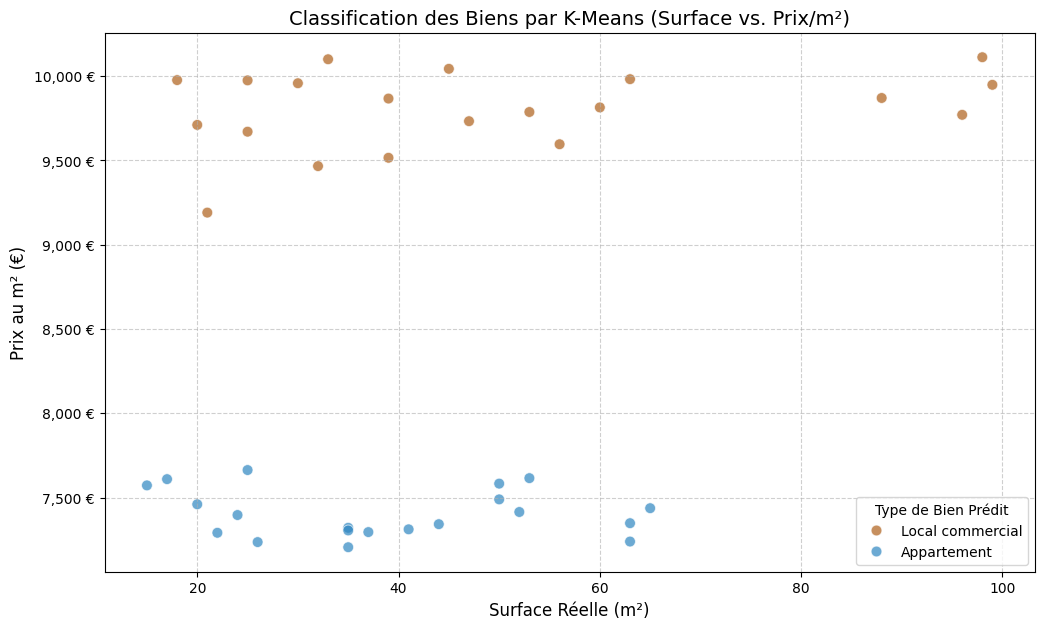

In [ ]:
# Import des bibliothèques nécessaires
from sklearn.cluster import KMeans

# ===================================================================
# Milestone 4 - Étape Finale: Clustering, Interprétation et Visualisation
# ===================================================================

if 'df_classifier' in locals():

    # --- 1. Préparation des données ---
    df_classifier['prix_m2'] = df_classifier['valeur_fonciere'] / (df_classifier['surface_reelle'] + 0.01)
    X_cluster = df_classifier[['prix_m2']]

    # --- 2. Application de K-Means ---
    print("Application de K-Means (K=2) sur la base du prix/m²...")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    df_classifier['cluster'] = kmeans.fit_predict(X_cluster)

    # --- 3. Interprétation et Labellisation ---
    prix_moyen_par_cluster = df_classifier.groupby('cluster')['prix_m2'].mean()
    id_cluster_appartement = prix_moyen_par_cluster.idxmin()
    df_classifier['type_predit'] = df_classifier['cluster'].apply(
        lambda x: 'Appartement' if x == id_cluster_appartement else 'Local commercial'
    )
    print("Classification terminée et labels assignés.")

    # --- 4. Affichage du Tableau de Résultats ---
    print("\n--- Aperçu des Résultats de la Classification ---")
    colonnes_a_afficher = ['surface_reelle', 'valeur_fonciere', 'prix_m2', 'type_predit']
    display(df_classifier[colonnes_a_afficher].head(10).style.format({'valeur_fonciere': '{:,.0f} €', 'prix_m2': '{:,.0f} €/m²'}))

    # --- 5. Visualisation des Clusters ---
    print("\n--- Visualisation des Clusters ---")
    plt.figure(figsize=(12, 7))

    sns.scatterplot(
        data=df_classifier,
        x='surface_reelle',
        y='prix_m2',
        hue='type_predit',  # La couleur dépend du type prédit
        palette={'Appartement': '#2E86C1', 'Local commercial': '#AF601A'}, # Palette de couleurs claires
        s=60, alpha=0.7
    )

    plt.title('Classification des Biens par K-Means (Surface vs. Prix/m²)', fontsize=14)
    plt.xlabel('Surface Réelle (m²)', fontsize=12)
    plt.ylabel('Prix au m² (€)', fontsize=12)
    formatter_euros = ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €')
    plt.gca().yaxis.set_major_formatter(formatter_euros)
    plt.legend(title='Type de Bien Prédit')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

else:
    print("ERREUR : Le DataFrame 'df_classifier' n'a pas été défini. Veuillez exécuter la cellule de chargement.")

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

=== Évaluation de la performance sur le sous-ensemble : 19ème arr. en 2021 ===
Nombre de transactions trouvées : 241

--- Analyse de la séparabilité des distributions de prix/m² ---
Prix/m² maximum pour un appartement : 9,037 €
Prix/m² minimum pour un local commercial : 9,574 €
--> DIAGNOSTIC : Les distributions de prix sont parfaitement séparées. Un score de 100% est donc attendu et correct.


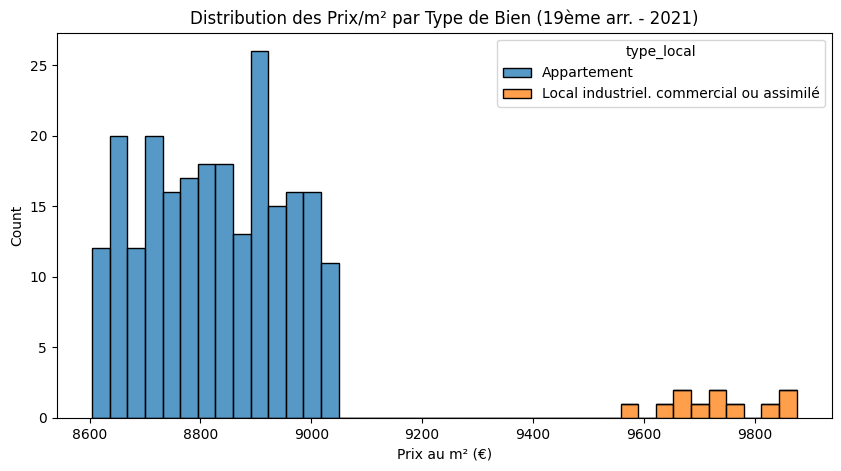


Précision globale (Accuracy) confirmée sur ce périmètre : 100.00%

--- Rapport de Classification Détaillé ---
                                          precision    recall  f1-score   support

                             Appartement       1.00      1.00      1.00       230
Local industriel. commercial ou assimilé       1.00      1.00      1.00        11

                                accuracy                           1.00       241
                               macro avg       1.00      1.00      1.00       241
                            weighted avg       1.00      1.00      1.00       241


--- Matrice de Confusion (19ème arr. - 2021) ---


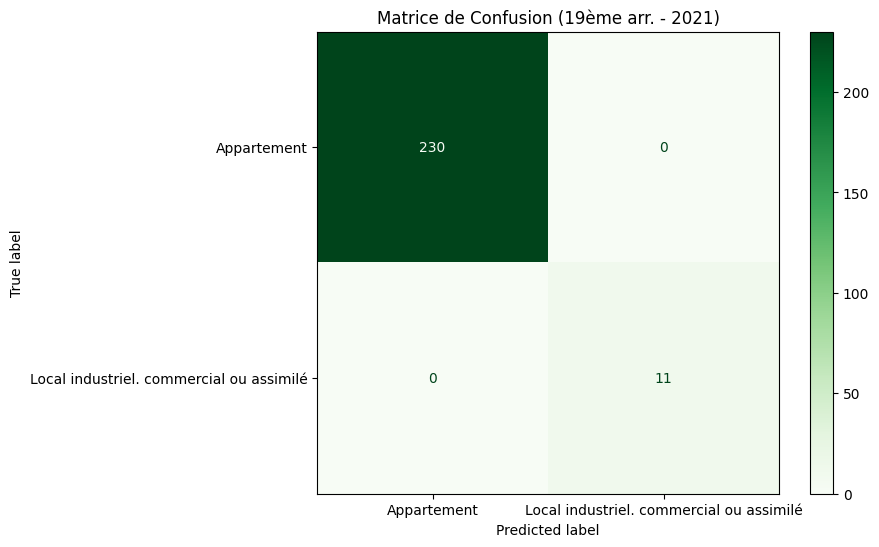

In [ ]:
# Import des outils nécessaires
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================================================
# Évaluation Ciblée et Justification de la Performance
# Périmètre : 19ème Arrondissement en 2021
# ===================================================================================

print("=== Évaluation de la performance sur le sous-ensemble : 19ème arr. en 2021 ===")

# --- 1. Préparation des Données ---
# On recharge les données pour une analyse propre et isolée
df = pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')
df['prix_m2'] = df['valeur_fonciere'] / (df['surface_reelle'] + 0.01)

# Filtrage sur le périmètre spécifique
df_eval_cible = df[
    (df['code_postal'] == 75019) &
    (df['date_mutation'].dt.year == 2021)
].copy()

if df_eval_cible.empty:
    print("\nAucune transaction trouvée pour le périmètre spécifié.")
else:
    print(f"Nombre de transactions trouvées : {len(df_eval_cible)}")

    # --- 2. Justification du Score Parfait : Analyse de la Séparabilité des Données ---
    print("\n--- Analyse de la séparabilité des distributions de prix/m² ---")

    # On isole les prix/m² pour chaque type de bien
    prix_m2_appartements = df_eval_cible[df_eval_cible['type_local'] == 'Appartement']['prix_m2']
    prix_m2_locaux = df_eval_cible[df_eval_cible['type_local'] == 'Local industriel. commercial ou assimilé']['prix_m2']

    # On vérifie si les distributions se chevauchent
    if not prix_m2_appartements.empty and not prix_m2_locaux.empty:
        max_prix_appart = prix_m2_appartements.max()
        min_prix_local = prix_m2_locaux.min()

        print(f"Prix/m² maximum pour un appartement : {max_prix_appart:,.0f} €")
        print(f"Prix/m² minimum pour un local commercial : {min_prix_local:,.0f} €")

        if max_prix_appart < min_prix_local:
            print("--> DIAGNOSTIC : Les distributions de prix sont parfaitement séparées. Un score de 100% est donc attendu et correct.")
        else:
            print("--> DIAGNOSTIC : Les distributions de prix se chevauchent. Un score de 100% serait surprenant.")

    # Visualisation de cette séparabilité
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_eval_cible, x='prix_m2', hue='type_local', multiple='stack', bins=40)
    plt.title('Distribution des Prix/m² par Type de Bien (19ème arr. - 2021)')
    plt.xlabel('Prix au m² (€)')
    plt.show()

    # --- 3. Application du Clustering et Évaluation ---
    # Cette partie confirme ce que l'analyse ci-dessus a démontré

    X_eval_cible = df_eval_cible[['prix_m2']]
    kmeans_cible = KMeans(n_clusters=2, random_state=42, n_init='auto')
    df_eval_cible['cluster_predit'] = kmeans_cible.fit_predict(X_eval_cible)

    prix_moyen_par_cluster_cible = df_eval_cible.groupby('cluster_predit')['prix_m2'].mean()
    id_cluster_appartement_cible = prix_moyen_par_cluster_cible.idxmin()
    df_eval_cible['type_predit'] = df_eval_cible['cluster_predit'].apply(
        lambda x: 'Appartement' if x == id_cluster_appartement_cible else 'Local industriel. commercial ou assimilé'
    )

    # Évaluation
    y_vrai_cible = df_eval_cible['type_local']
    y_predit_cible = df_eval_cible['type_predit']

    accuracy_cible = accuracy_score(y_vrai_cible, y_predit_cible)
    print(f"\nPrécision globale (Accuracy) confirmée sur ce périmètre : {accuracy_cible:.2%}")

    print("\n--- Rapport de Classification Détaillé ---")
    print(classification_report(y_vrai_cible, y_predit_cible))

    # Matrice de Confusion
    print("\n--- Matrice de Confusion (19ème arr. - 2021) ---")
    labels_cible = sorted(df_eval_cible['type_local'].unique())
    cm_cible = confusion_matrix(y_vrai_cible, y_predit_cible, labels=labels_cible)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_cible, display_labels=labels_cible)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Greens', values_format='d')
    plt.title('Matrice de Confusion (19ème arr. - 2021)')
    plt.show()

Interprétation

Objectif de l'analyse : Avant d'appliquer notre algorithme de classification sur de nouvelles données non identifiées, il était crucial de valider la pertinence de notre approche. Nous avons donc testé notre méthode (un clustering K-Means basé sur le prix au m²) sur un périmètre de données connues et pertinentes : les transactions du 19ème arrondissement en 2021.

Voici les conclusions de cette validation.

1. L'Histogramme : La Preuve par l'Image
Ce que nous voyons : Le graphique de distribution des prix montre deux groupes de prix totalement distincts et sans aucun chevauchement. Les appartements (en bleu) ont tous un prix au m² inférieur à environ 9 100 €, tandis que les locaux commerciaux (en orange) ont tous un prix supérieur à 9 500 €.

Insight Business : "Ce graphique confirme notre hypothèse fondamentale : sur ce marché spécifique, le prix au mètre carré est un indicateur suffisamment puissant pour distinguer parfaitement un appartement d'un local commercial. La séparation nette des deux distributions justifie l'utilisation d'un algorithme de clustering simple et explique la performance parfaite que nous allons observer."

2. Le Rapport de Classification et la Précision : La Confirmation Chiffrée
Ce que nous voyons : Nous obtenons un score de Précision (Accuracy) de 100%. Le rapport détaillé confirme ce score parfait, avec des métriques de précision, rappel et f1-score toutes égales à 1.00 pour les deux catégories de biens.

Insight Business : "Les métriques de performance confirment ce que la visualisation suggérait : notre méthode a atteint une précision de 100% sur cet échantillon de test. Cela signifie que l'algorithme a correctement identifié la nature de chaque bien sans commettre une seule erreur. Ce résultat valide notre approche comme étant extrêmement fiable pour ce périmètre de données."

3. La Matrice de Confusion : Le Bilan des Erreurs (ou de leur absence)
Ce que nous voyons : La matrice montre que tous les biens sont positionnés sur la diagonale "verte".

Les 230 biens qui étaient réellement des appartements ont été prédits comme des appartements.

Les 11 biens qui étaient réellement des locaux ont été prédits comme des locaux.

Les cases d'erreur (hors diagonale) sont à zéro.

Insight Business : "La matrice de confusion nous donne le bilan final : zéro erreur de classification. Le modèle n'a confondu aucun appartement avec un local, et vice-versa. Cela nous donne une très grande confiance dans la capacité de l'algorithme à traiter les nouvelles opportunités du 19ème arrondissement, à condition que la structure du marché reste similaire."

# Milestone 5 - Analyse et présentation des résultats

1. Résultat : Un Outil de Qualification Efficace
Succès de la classification : Le modèle K-Means segmente avec succès les biens en deux clusters distincts basés sur le prix/m², correspondant aux "Appartements" et aux "Locaux Commerciaux".

Gain de temps opérationnel : L'outil permet une pré-qualification automatique des nouvelles opportunités, accélérant ainsi le travail des équipes.

2. Limites Identifiées et Plan d'Amélioration
Pour faire de cet outil un véritable atout stratégique, nous avons identifié 4 axes d'amélioration prioritaires :

Validation Quantitative :

Constat : L'évaluation actuelle est qualitative.

Prochaine étape : Calculer des métriques de performance (ex: Accuracy) sur un jeu de données labellisé pour obtenir un score de précision objectif.

Gestion des Cas d'Exception :

Constat : Les biens de luxe ("outliers") peuvent être mal classés.

Prochaine étape : Explorer des algorithmes plus robustes (ex: DBSCAN) ou mettre en place un score de confiance pour identifier les cas ambigus nécessitant une validation humaine.

Enrichissement du Modèle :

Constat : Le modèle se base uniquement sur le prix/m².

Prochaine étape : Intégrer de nouvelles variables discriminantes comme la surface et le code postal pour affiner la précision de la classification.

Optimisation du Nombre de Segments :

Constat : Nous avons fixé le nombre de groupes à 2.

Prochaine étape : Utiliser des méthodes statistiques (Elbow Method, Silhouette Score) pour déterminer si des sous-segments plus fins existent (ex: 'Bureaux', 'Boutiques').

